# Analisi subset A - Interacciones con la computadora

# 0. Descripción de los subsets del grupo A

Estos subset describen la interacciómn humana con la computadora. Tenemos tres subsets:

+ A - Computer interaction features (Ulog - All Features per minute)-Sheet_1: En este se recogen las features que se han generado a traves de las interacciones delusuario con la computadora. Tenemos varías columnas que se detallan a continuación.

  *Metadatos generales:*
  - **PP**: Identificador del participante.
  - **Blok**: Bloque experimental en el que se encuentra el participante.
  - **Condition**: Condición experimental en la que se realizó la medición.
  - **timestamp**: Marca de tiempo indicando el minuto exacto de la medición.

  *Interacciones con el ratón:*
  - **SnMouseAct**: Número total de acciones realizadas con el ratón (clics, - desplazamientos, etc.).
  - **SnLeftClicked**: Número de clics con el botón izquierdo del ratón.
  - **SnRightClicked**: Número de clics con el botón derecho del ratón.
  - **SnDoubleClicked**: Número de doble clics registrados.
  - **SnWheel**: Número de eventos de desplazamiento (scroll) con la rueda del ratón.
  - **SnDragged**: Número de veces que se arrastró un elemento con el ratón.
  - **SnMouseDistance**: Distancia total recorrida por el puntero del ratón   - (posiblemente en píxeles).

  *Interacciones con el teclado:*
  - **SnKeyStrokes**: Número total de pulsaciones de teclas.
  - **SnChars**: Número total de caracteres escritos.
  - **SnSpecialKeys**: Número de veces que se presionaron teclas especiales (Ctrl, Alt,   Shift, etc.).
  - **SnDirectionKeys**: Número de veces que se usaron las teclas de dirección  (flechas).
  - **SnErrorKeys**: Número de errores de tipeo detectados (posiblemente retrocesos y   correcciones).
  - **SnShortcutKeys**: Número de combinaciones de teclas de acceso rápido utilizadas   (por ejemplo, Ctrl+C, Alt+Tab).
  - **SnSpaces**: Número de veces que se presionó la barra espaciadora.

  *Cambio de aplicaciones:*
  - **SnAppChange**: Número de veces que se cambió entre aplicaciones activas.
  - **SnTabfocusChange**: Número de cambios de foco entre pestañas dentro de una aplicación.
  
+ A - Computer interaction features (Ulog - All Features per minute)-Sheet_2.ods: Es un registro de las anotaciones durante la realización del experimento donde se detalla la hora d einicio, hora final, el tiempo de video y el tiempo de tareas a las que los participantes fueron somentidos. Es meramente informativo y sirve para comprender el experimento pero así para tenerlo en cuenta en los análisis de datos ya que no contiene características.

+ A - Computer interaction features (Ulog - All Features per minute)-Sheet_3.csv: Contiene las mismas fetures que A - Computer interaction features (Ulog - All Features per minute)-Sheet_1, se va analizar porque hay dos archivos con aparantemento los mismo datos y la posibilidad de hacer un cruce información entre ambos para tener un conjunto de datos lo más completo posible.

# 1.Limpieza de los archivos con features incrustadas: A - Computer interaction features (Ulog - All Features per minute)-Sheet_1 y A - Computer interaction features (Ulog - All Features per minute)-Sheet_3.csv

In [2]:
#Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer

#Utils
from utils import *


## 1.1 - Carga y lectura de los datos

In [3]:
sheet_1 = cargar_datos_csv("A - Computer interaction features (Ulog - All Features per minute)-Sheet_1.csv")

Datos cargados correctamente: A - Computer interaction features (Ulog - All Features per minute)-Sheet_1.csv


In [4]:
sheet_3 = cargar_datos_csv("A - Computer interaction features (Ulog - All Features per minute)-Sheet_3.csv")

Datos cargados correctamente: A - Computer interaction features (Ulog - All Features per minute)-Sheet_3.csv


## 1.2 - Limpieza de los archivos y comparación entre ambos

In [5]:
sheet_1.shape, sheet_3.shape

((3139, 22), (3140, 21))

In [6]:
#En el archivo ...sheet1 vemos que hay dos columnas generadas por pandas al archivo contar el fin de fila con ",,". Vamos a eliminarlas.
columnas_a_eliminar_sheet_1 = ["Unnamed: 20", "Unnamed: 21"]
sheet_1 = eliminar_columnas(sheet_1, columnas_a_eliminar_sheet_1)


Se eliminaron las columnas: ['Unnamed: 20', 'Unnamed: 21']


In [7]:
comparar_columnas(sheet_1, sheet_3)

Columnas en común: {'SnLeftClicked', 'SnDoubleClicked', 'Condition', 'SnRightClicked', 'SnMouseAct', 'SnShortcutKeys', 'SnErrorKeys', 'timestamp', 'SnSpaces', 'SnAppChange', 'SnDirectionKeys', 'SnWheel', 'SnDragged', 'Blok', 'SnTabfocusChange', 'SnMouseDistance', 'SnKeyStrokes', 'PP', 'SnSpecialKeys', 'SnChars'}
Columnas solo en el primer archivo: set()
Columnas solo en el segundo archivo: {'SnMouseDistance.1'}


In [8]:
evaluar_datos_faltantes(sheet_1)

,Columna,Valores Faltantes,Porcentaje (%)
PP,PP,0,0.0
Blok,Blok,0,0.0
Condition,Condition,0,0.0
timestamp,timestamp,0,0.0
SnMouseAct,SnMouseAct,0,0.0
SnLeftClicked,SnLeftClicked,0,0.0
SnRightClicked,SnRightClicked,0,0.0
SnDoubleClicked,SnDoubleClicked,0,0.0
SnWheel,SnWheel,0,0.0
SnDragged,SnDragged,0,0.0


In [9]:
evaluar_datos_faltantes(sheet_3)

,Columna,Valores Faltantes,Porcentaje (%)
SnMouseAct,SnMouseAct,31,0.987261
SnWheel,SnWheel,31,0.987261
SnDoubleClicked,SnDoubleClicked,31,0.987261
SnRightClicked,SnRightClicked,31,0.987261
SnLeftClicked,SnLeftClicked,31,0.987261
SnShortcutKeys,SnShortcutKeys,31,0.987261
SnSpaces,SnSpaces,31,0.987261
SnDirectionKeys,SnDirectionKeys,31,0.987261
SnErrorKeys,SnErrorKeys,31,0.987261
SnDragged,SnDragged,31,0.987261


In [10]:
##Vamos a entender bien porque SnMouseDistance y SnMouseDistance.1 están en el mismo archivo. Podría ser una dulicación
calcular_correlacion(sheet_3, "SnMouseDistance", "SnMouseDistance.1")

Correlación entre SnMouseDistance y SnMouseDistance.1: 1.0000


np.float64(0.9999999997666237)

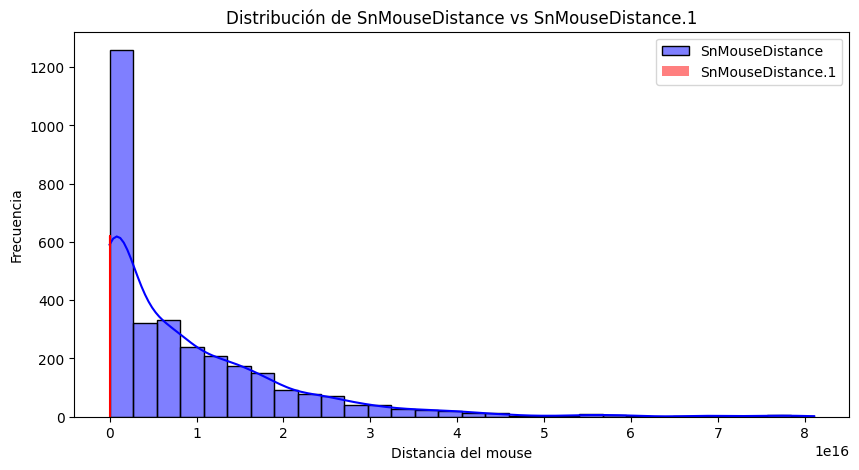

In [11]:
graficar_histogramas_2col(sheet_3, "SnMouseDistance", "SnMouseDistance.1")

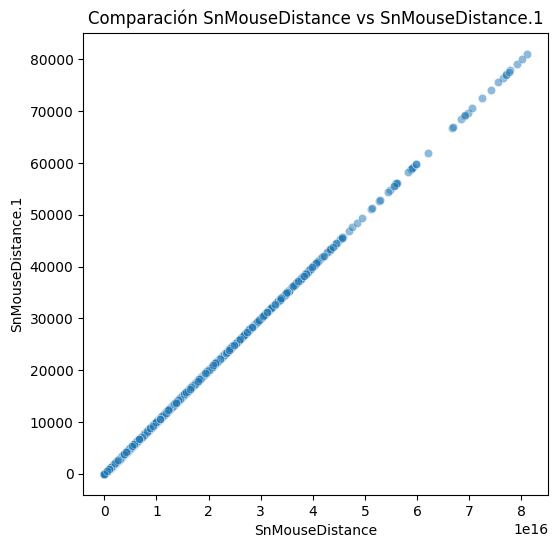

In [12]:
graficar_scatter(sheet_3, "SnMouseDistance", "SnMouseDistance.1")

Tras analizar las dos columnas vemos que SnMouseDistance.1 no es relevante y la podemos eliminar.

In [13]:
#Eliminar columna SnMouseDistance.1 de sheet3
columnas_a_eliminar_sheet_3 = ["SnMouseDistance"]
sheet_3 = eliminar_columnas(sheet_3, columnas_a_eliminar_sheet_3)

Se eliminaron las columnas: ['SnMouseDistance']


## 1.2 - Análisis exploratorio

Voy a hacer un análisis exploratorio de las features por condition

In [14]:
sheet_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3139 entries, 0 to 3138
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   PP                3139 non-null   object        
 1   Blok              3139 non-null   int64         
 2   Condition         3139 non-null   object        
 3   timestamp         3139 non-null   datetime64[ns]
 4   SnMouseAct        3139 non-null   int64         
 5   SnLeftClicked     3139 non-null   int64         
 6   SnRightClicked    3139 non-null   int64         
 7   SnDoubleClicked   3139 non-null   int64         
 8   SnWheel           3139 non-null   int64         
 9   SnDragged         3139 non-null   int64         
 10  SnMouseDistance   3139 non-null   object        
 11  SnKeyStrokes      3139 non-null   int64         
 12  SnChars           3139 non-null   int64         
 13  SnSpecialKeys     3139 non-null   int64         
 14  SnDirectionKeys   3139 n

In [15]:
sheet_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   PP                 3140 non-null   object        
 1   Blok               3140 non-null   int64         
 2   Condition          3140 non-null   object        
 3   timestamp          3140 non-null   datetime64[ns]
 4   SnMouseAct         3109 non-null   float64       
 5   SnLeftClicked      3109 non-null   float64       
 6   SnRightClicked     3109 non-null   float64       
 7   SnDoubleClicked    3109 non-null   float64       
 8   SnWheel            3109 non-null   float64       
 9   SnDragged          3109 non-null   float64       
 10  SnMouseDistance.1  3140 non-null   int64         
 11  SnKeyStrokes       3109 non-null   float64       
 12  SnChars            3109 non-null   float64       
 13  SnSpecialKeys      3109 non-null   float64       
 14  SnDirect

In [16]:
#Vamos a investigar la columna SnMouseDistance de sheet_1. La marca como object y debería ser float.
#¿Por qué habrá inferido pandas a tipo objeto? ¿Tiene algún error?

sheet_1["SnMouseDistance"].describe(), sheet_1["SnMouseDistance"].unique(), sheet_1["SnMouseDistance"].value_counts(), sheet_1["SnMouseDistance"].dtype

(count               3139
 unique              2296
 top       0.000000000000
 freq                 813
 Name: SnMouseDistance, dtype: object,
 array(['0.000000000000', '5691.235163195810', '7726.999222977160', ...,
        '518.719653304716', '17928.897687481700', '28311.923199702600'],
       shape=(2296,), dtype=object),
 SnMouseDistance
 0.000000000000        813
 999.000000000000       31
 #VALUE!                 2
 2670.793367081960       1
 5767.283814678420       1
                      ... 
 12869.706334427700      1
 12036.332510406000      1
 46857.388008926200      1
 669.295764993331        1
 24669.271105170600      1
 Name: count, Length: 2296, dtype: int64,
 dtype('O'))

In [17]:
#Ya vemos el problema, dos valores son #VALUE!. Vamos a convertirlos en 999 que como el expiremento marca los NAN
sheet_1['SnMouseDistance'] = sheet_1['SnMouseDistance'].replace('#VALUE!', 999)
#  convierte a numérico, forzando los errores a NaN
sheet_1['SnMouseDistance'] = pd.to_numeric(sheet_1['SnMouseDistance'], errors='coerce')
# Reemplaza 999 por nan
sheet_1['SnMouseDistance'] = sheet_1['SnMouseDistance'].replace(999, np.nan)

In [18]:
sheet_1["SnMouseDistance"].value_counts()

SnMouseDistance
0.000000        813
7726.999223       1
6307.768271       1
31920.220434      1
24669.271105      1
               ... 
5810.877990       1
7430.615653       1
12869.706334      1
12036.332510      1
5691.235163       1
Name: count, Length: 2294, dtype: int64

In [19]:
sheet_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3139 entries, 0 to 3138
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   PP                3139 non-null   object        
 1   Blok              3139 non-null   int64         
 2   Condition         3139 non-null   object        
 3   timestamp         3139 non-null   datetime64[ns]
 4   SnMouseAct        3139 non-null   int64         
 5   SnLeftClicked     3139 non-null   int64         
 6   SnRightClicked    3139 non-null   int64         
 7   SnDoubleClicked   3139 non-null   int64         
 8   SnWheel           3139 non-null   int64         
 9   SnDragged         3139 non-null   int64         
 10  SnMouseDistance   3106 non-null   float64       
 11  SnKeyStrokes      3139 non-null   int64         
 12  SnChars           3139 non-null   int64         
 13  SnSpecialKeys     3139 non-null   int64         
 14  SnDirectionKeys   3139 n

In [20]:
# Asegurarse de que las otras columnas están en su tipo correcto
sheet_1['SnMouseDistance']= sheet_1['SnMouseDistance'].astype(float)
sheet_1['PP'] = sheet_1['PP'].astype(str)
sheet_1['Blok'] = sheet_1['Blok'].astype(str)
sheet_1['Condition'] = sheet_1['Condition'].astype(str)
sheet_1['timestamp'] = pd.to_datetime(sheet_1['timestamp'])
sheet_1['SnMouseAct'] = sheet_1['SnMouseAct'].astype(float)
sheet_1['SnLeftClicked'] = sheet_1['SnLeftClicked'].astype(float)
sheet_1['SnRightClicked'] = sheet_1['SnRightClicked'].astype(float)
sheet_1['SnDoubleClicked'] = sheet_1['SnDoubleClicked'].astype(float)
sheet_1['SnWheel'] = sheet_1['SnWheel'].astype(float)
sheet_1['SnDragged'] = sheet_1['SnDragged'].astype(float)
sheet_1['SnKeyStrokes'] = sheet_1['SnKeyStrokes'].astype(float)
sheet_1['SnChars'] = sheet_1['SnChars'].astype(float)
sheet_1['SnSpecialKeys'] = sheet_1['SnSpecialKeys'].astype(float)
sheet_1['SnDirectionKeys'] = sheet_1['SnDirectionKeys'].astype(float)
sheet_1['SnErrorKeys'] = sheet_1['SnErrorKeys'].astype(float)
sheet_1['SnShortcutKeys'] = sheet_1['SnShortcutKeys'].astype(float)
sheet_1['SnSpaces'] = sheet_1['SnSpaces'].astype(float)
sheet_1['SnAppChange'] = sheet_1['SnAppChange'].astype(float)
sheet_1['SnTabfocusChange'] = sheet_1['SnTabfocusChange'].astype(float)

In [21]:
sheet_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3139 entries, 0 to 3138
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   PP                3139 non-null   object        
 1   Blok              3139 non-null   object        
 2   Condition         3139 non-null   object        
 3   timestamp         3139 non-null   datetime64[ns]
 4   SnMouseAct        3139 non-null   float64       
 5   SnLeftClicked     3139 non-null   float64       
 6   SnRightClicked    3139 non-null   float64       
 7   SnDoubleClicked   3139 non-null   float64       
 8   SnWheel           3139 non-null   float64       
 9   SnDragged         3139 non-null   float64       
 10  SnMouseDistance   3106 non-null   float64       
 11  SnKeyStrokes      3139 non-null   float64       
 12  SnChars           3139 non-null   float64       
 13  SnSpecialKeys     3139 non-null   float64       
 14  SnDirectionKeys   3139 n

In [22]:
sheet_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   PP                 3140 non-null   object        
 1   Blok               3140 non-null   int64         
 2   Condition          3140 non-null   object        
 3   timestamp          3140 non-null   datetime64[ns]
 4   SnMouseAct         3109 non-null   float64       
 5   SnLeftClicked      3109 non-null   float64       
 6   SnRightClicked     3109 non-null   float64       
 7   SnDoubleClicked    3109 non-null   float64       
 8   SnWheel            3109 non-null   float64       
 9   SnDragged          3109 non-null   float64       
 10  SnMouseDistance.1  3140 non-null   int64         
 11  SnKeyStrokes       3109 non-null   float64       
 12  SnChars            3109 non-null   float64       
 13  SnSpecialKeys      3109 non-null   float64       
 14  SnDirect

In [23]:
#Convierto en sheet_3 Blok en str para seguir la misma convención
sheet_3['Blok'] = sheet_3['Blok'].astype(str)
# Convierto SnMouseDistance.1 a float
sheet_3['SnMouseDistance.1'] = sheet_3['SnMouseDistance.1'].astype('float64')

In [24]:
sheet_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   PP                 3140 non-null   object        
 1   Blok               3140 non-null   object        
 2   Condition          3140 non-null   object        
 3   timestamp          3140 non-null   datetime64[ns]
 4   SnMouseAct         3109 non-null   float64       
 5   SnLeftClicked      3109 non-null   float64       
 6   SnRightClicked     3109 non-null   float64       
 7   SnDoubleClicked    3109 non-null   float64       
 8   SnWheel            3109 non-null   float64       
 9   SnDragged          3109 non-null   float64       
 10  SnMouseDistance.1  3140 non-null   float64       
 11  SnKeyStrokes       3109 non-null   float64       
 12  SnChars            3109 non-null   float64       
 13  SnSpecialKeys      3109 non-null   float64       
 14  SnDirect

In [25]:
columnas_numericas_1 = sheet_1.select_dtypes(include=["number"]).columns.tolist()
columnas_numericas_3 = sheet_3.select_dtypes(include=["number"]).columns.tolist()

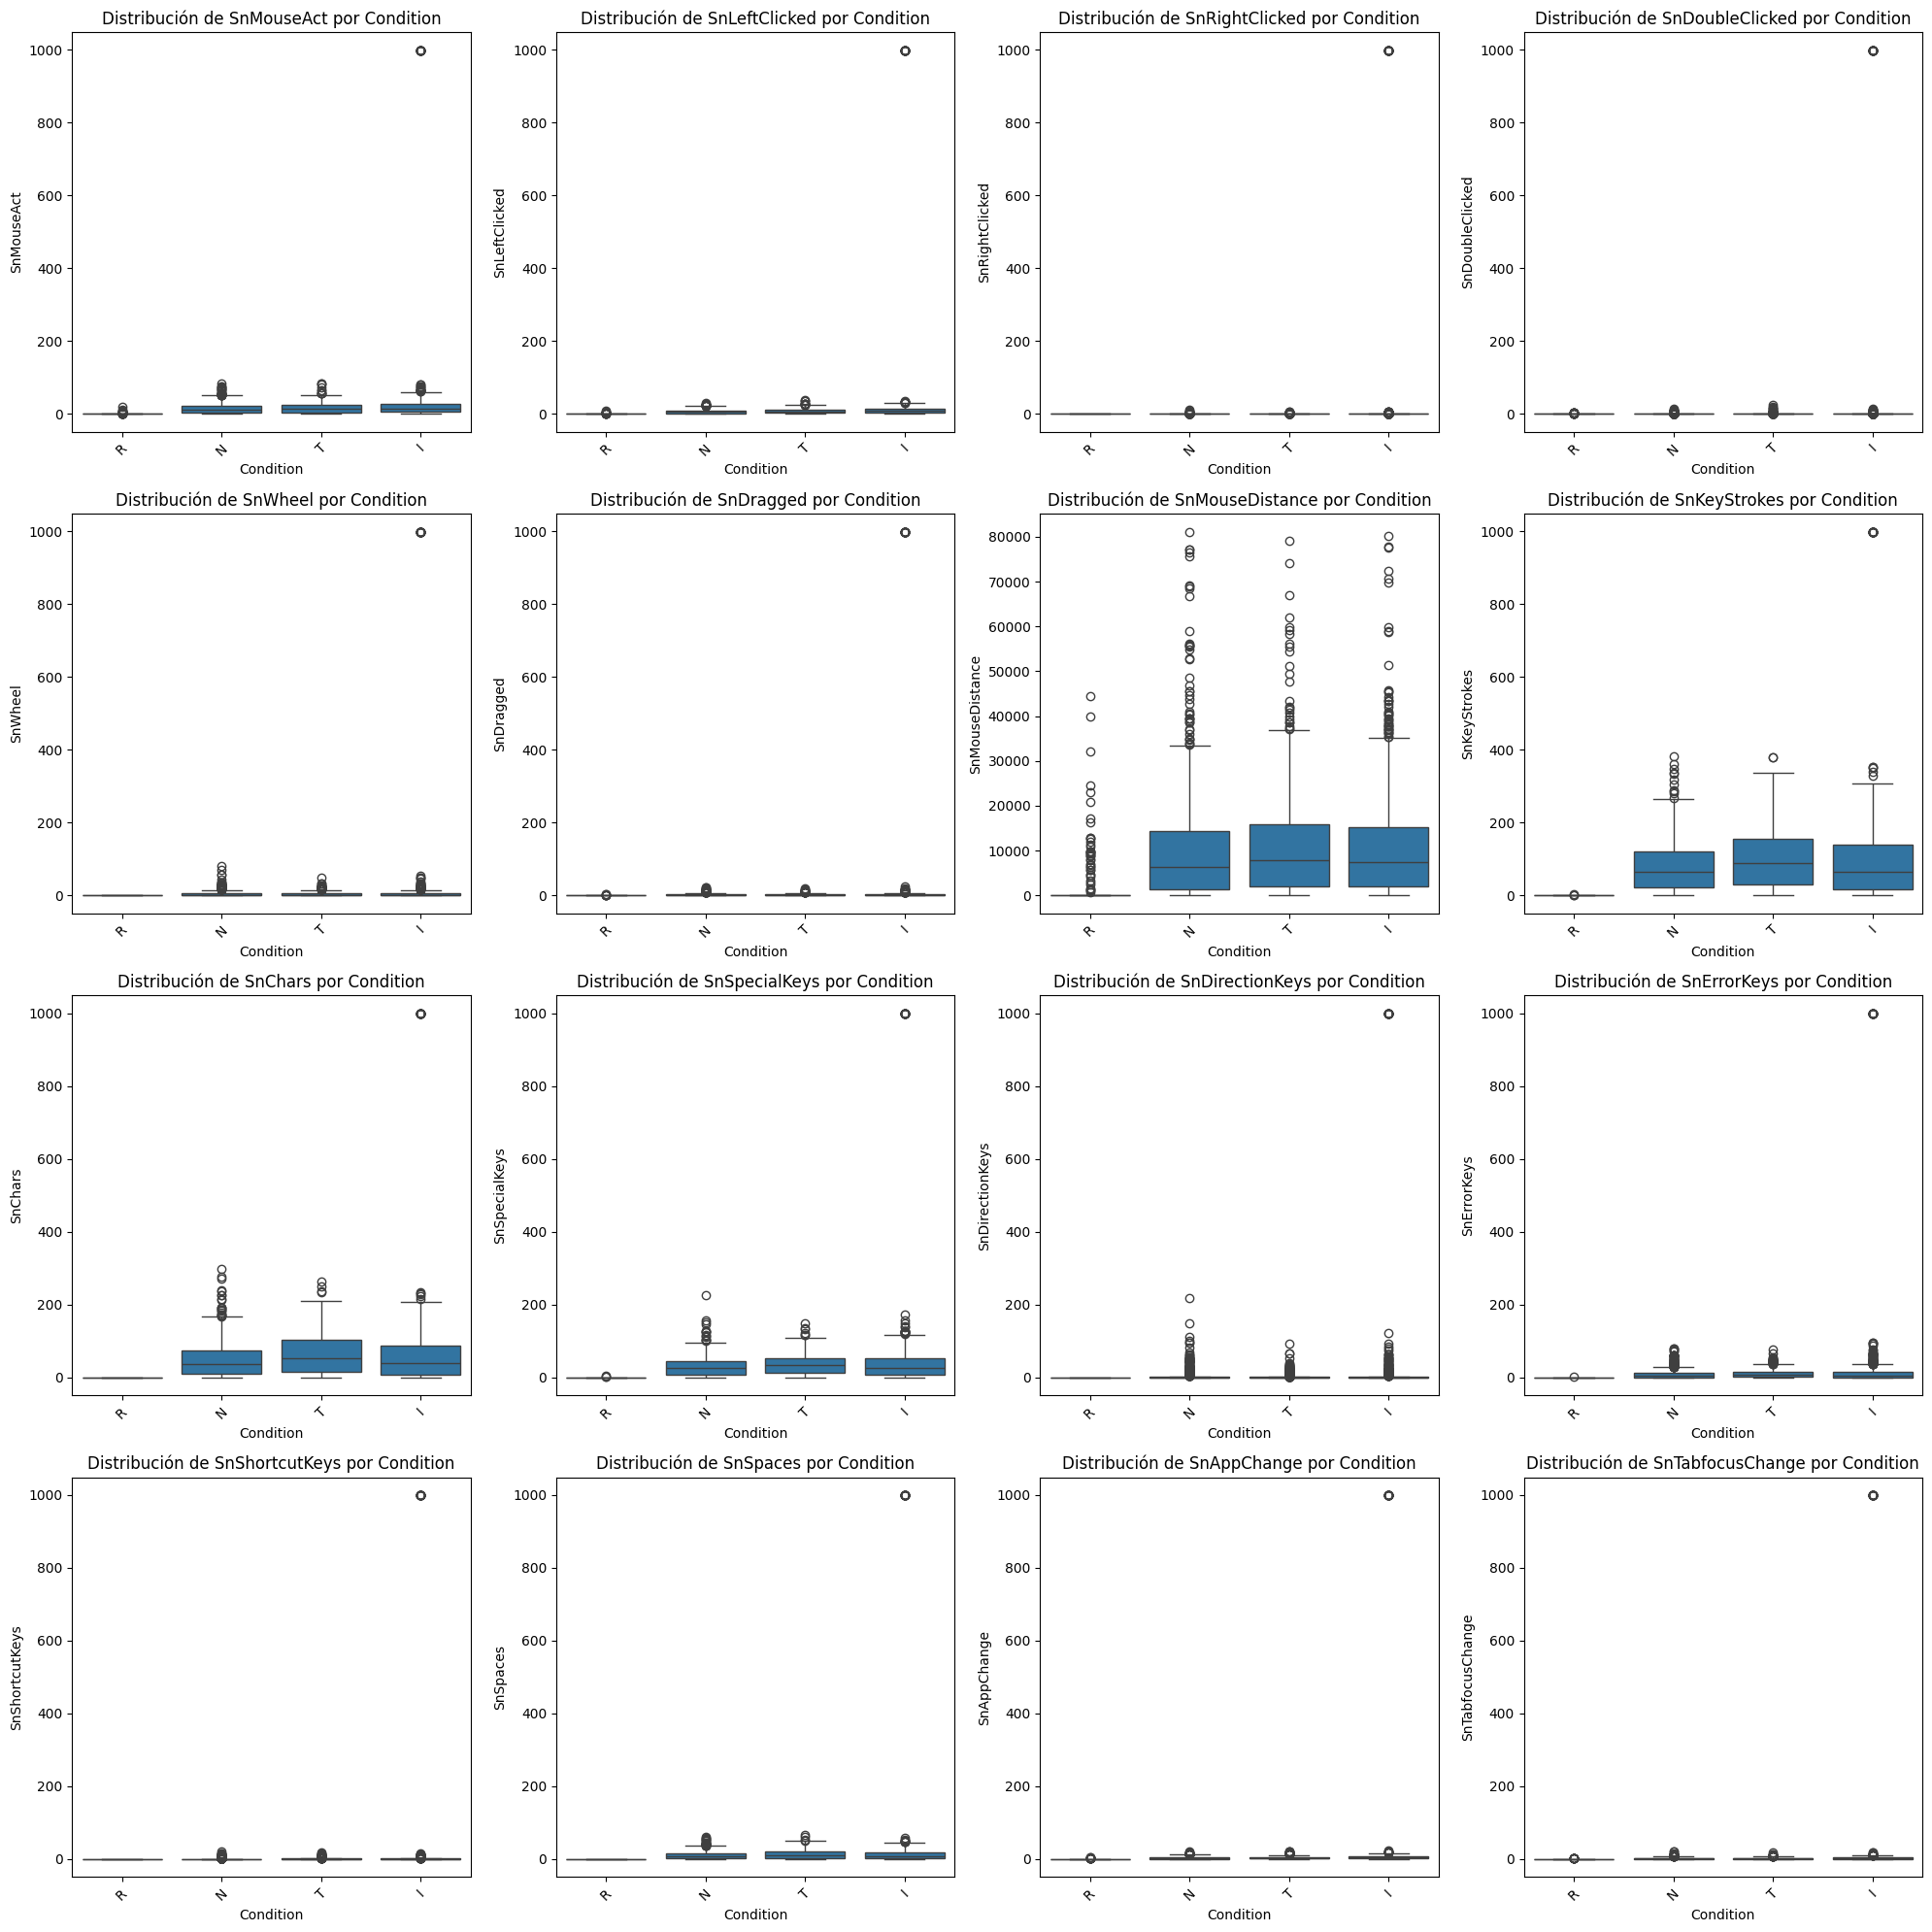

In [26]:
graficar_boxplots(sheet_1, columnas_numericas_1)

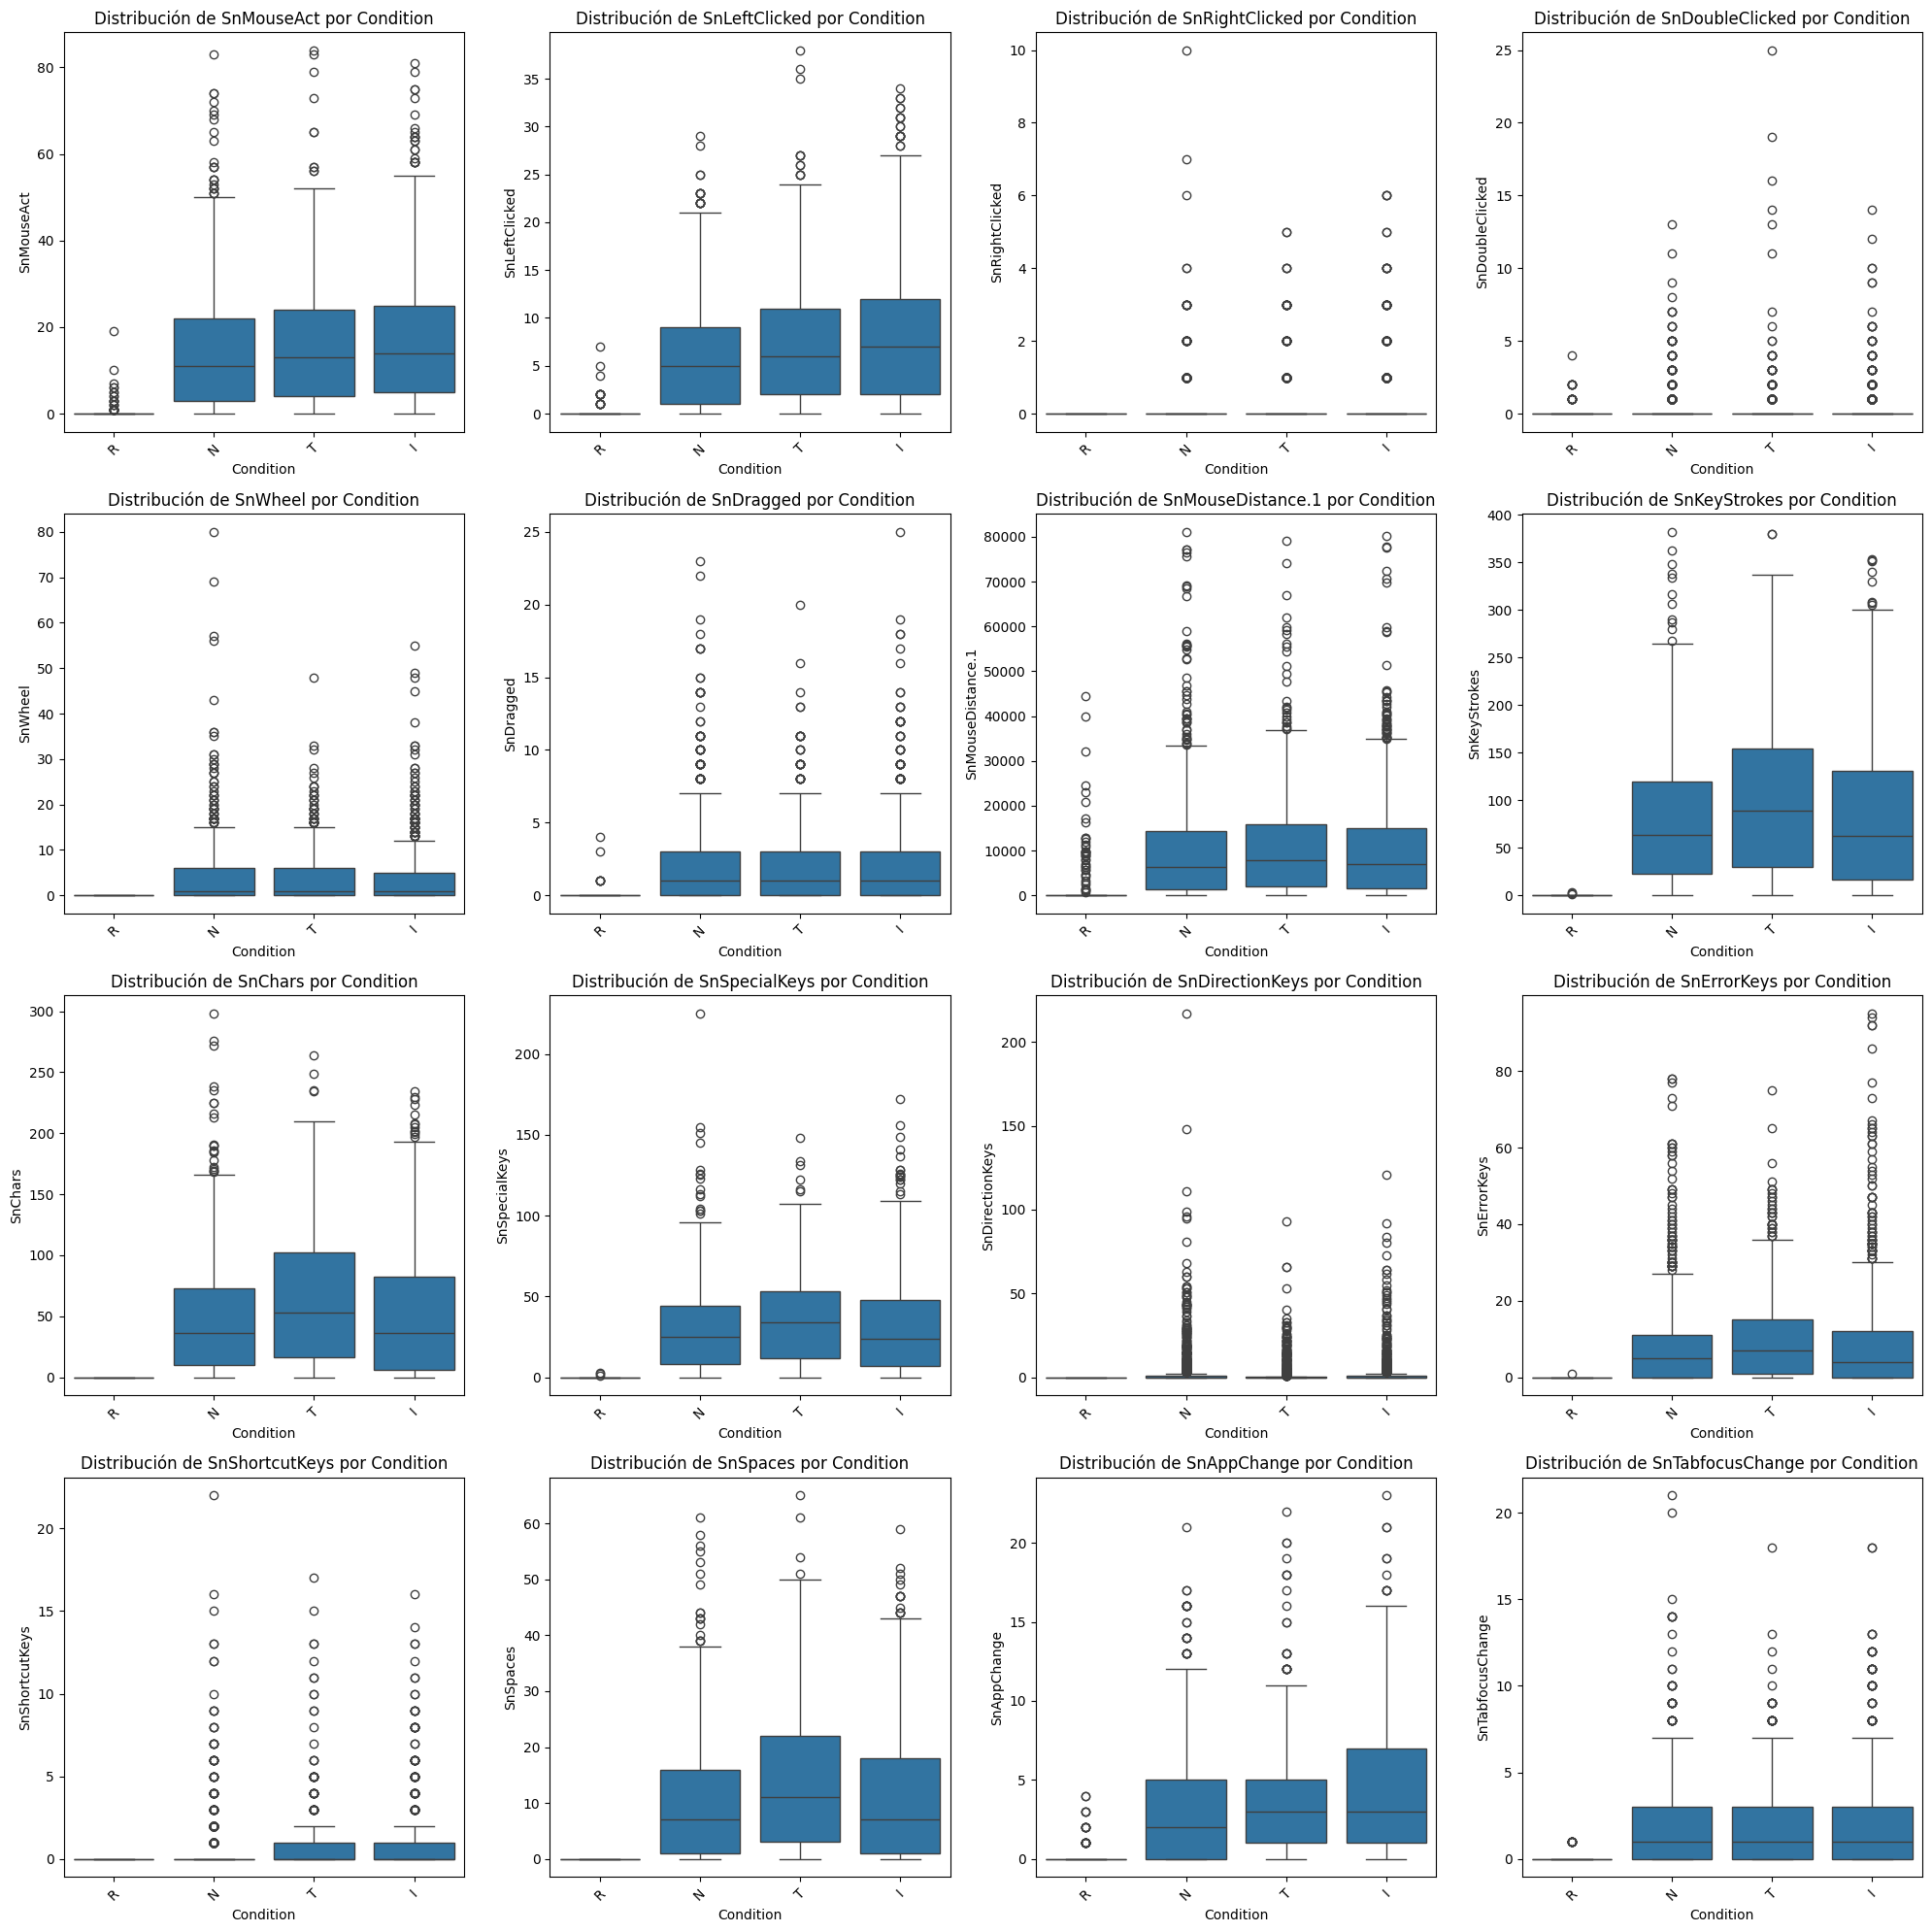

In [27]:
graficar_boxplots(sheet_3,columnas_numericas_3)

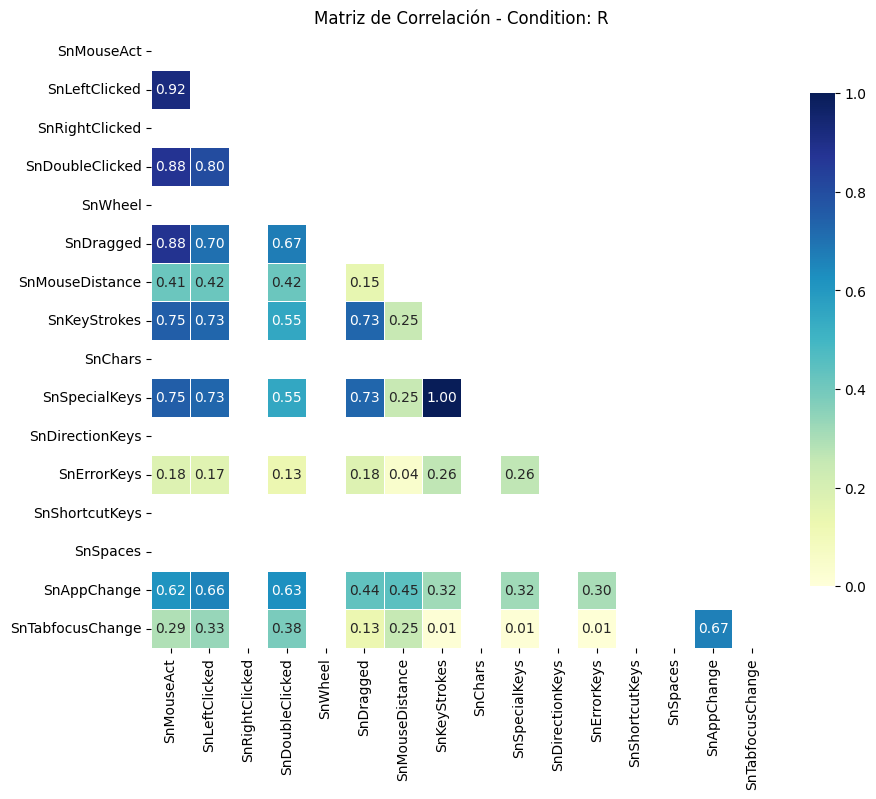

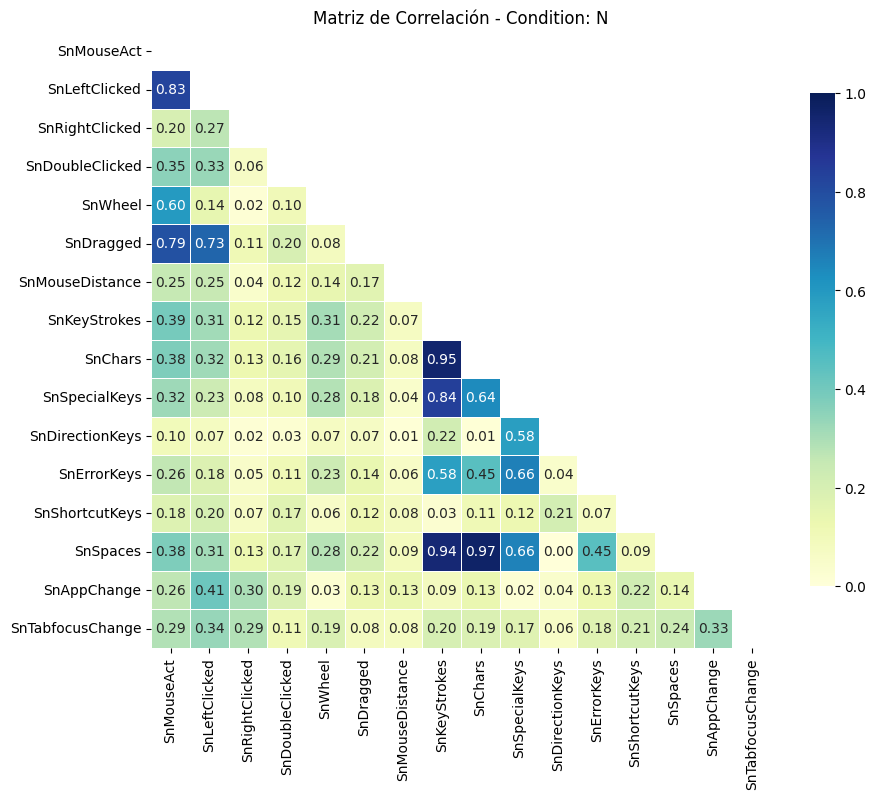

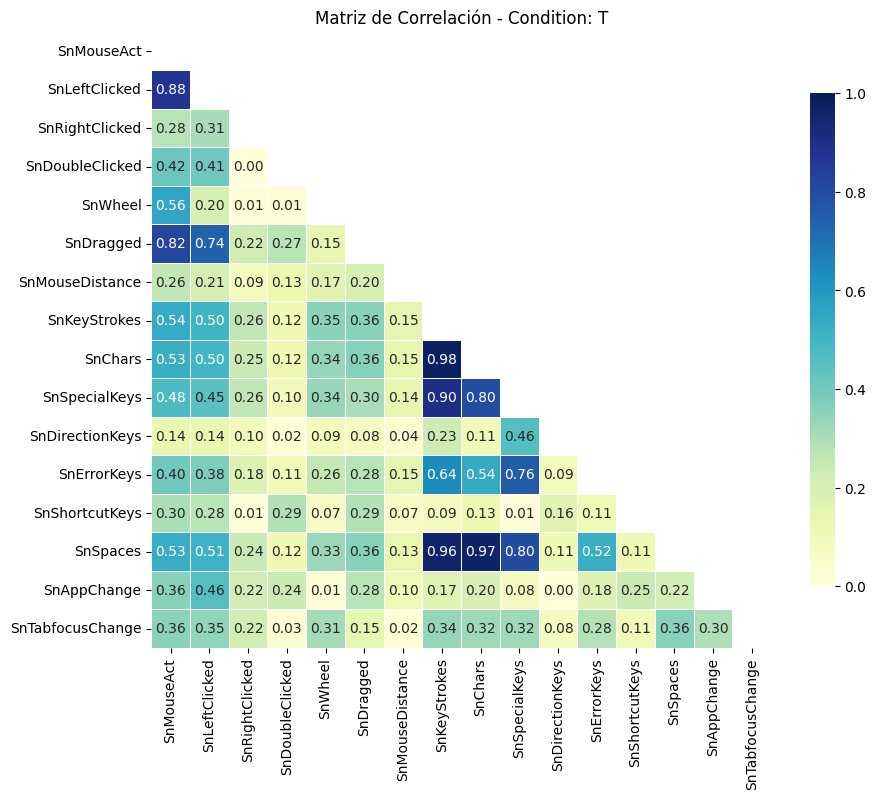

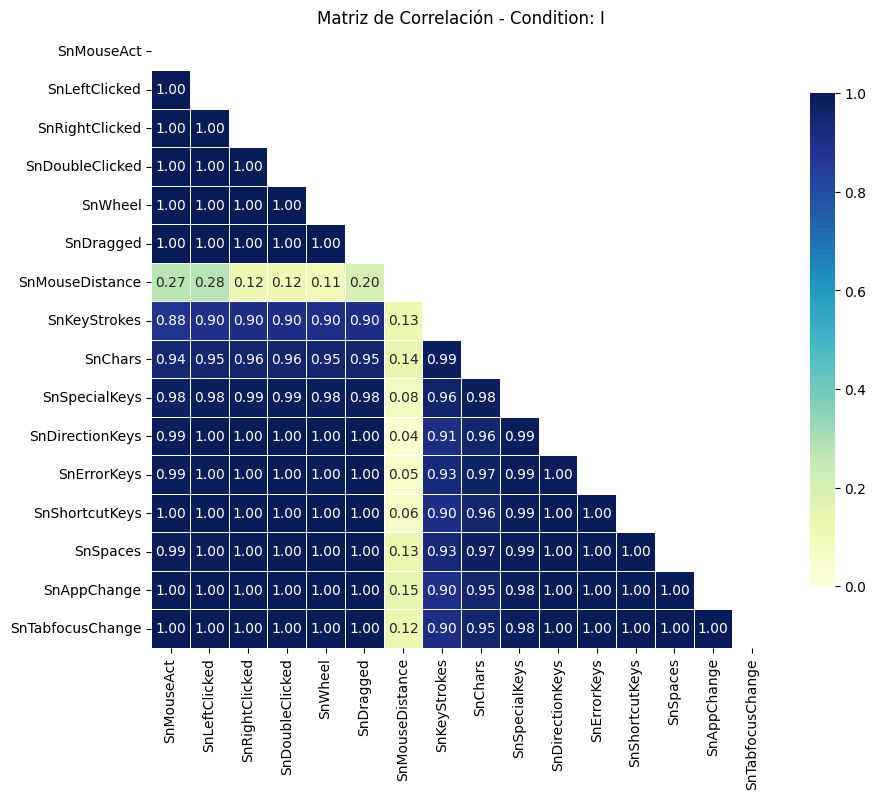

In [28]:
correlacion_por_condition(sheet_1, columnas_numericas_1)

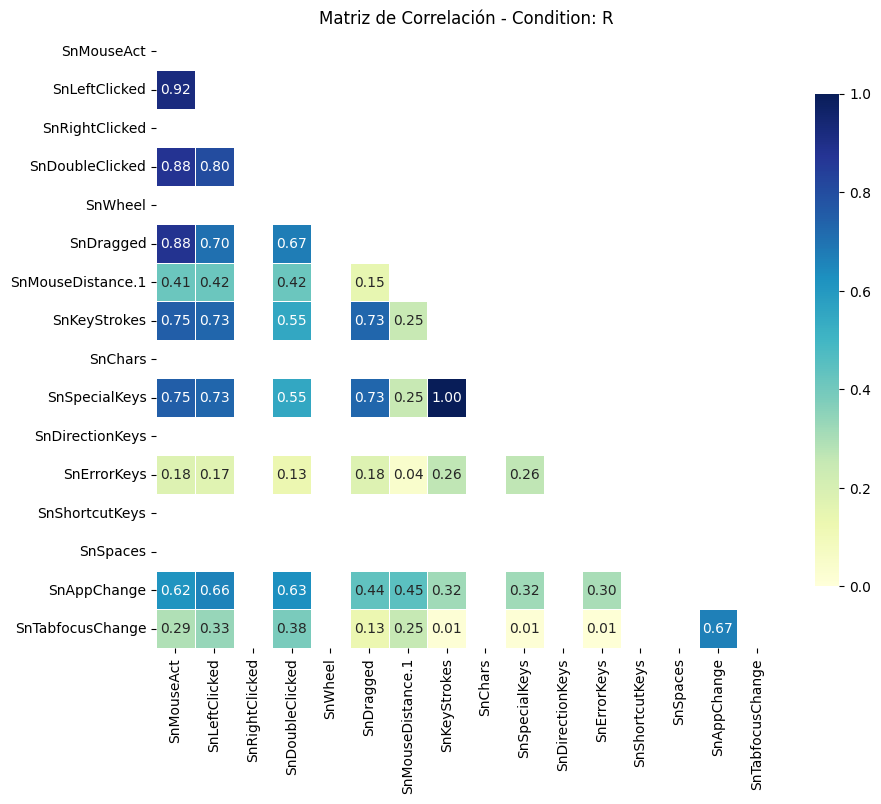

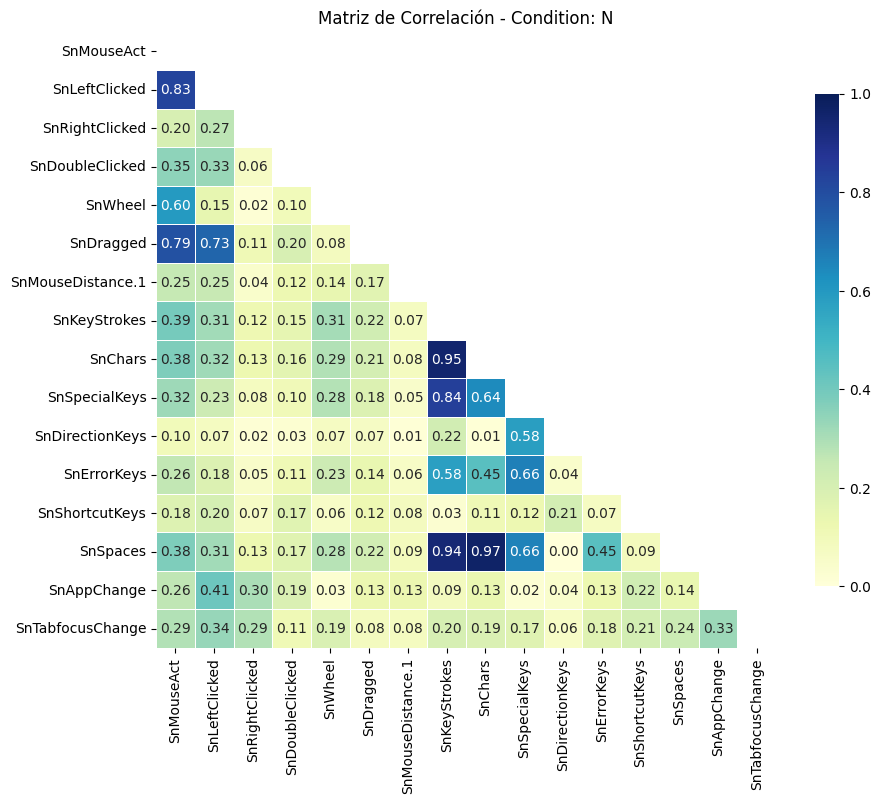

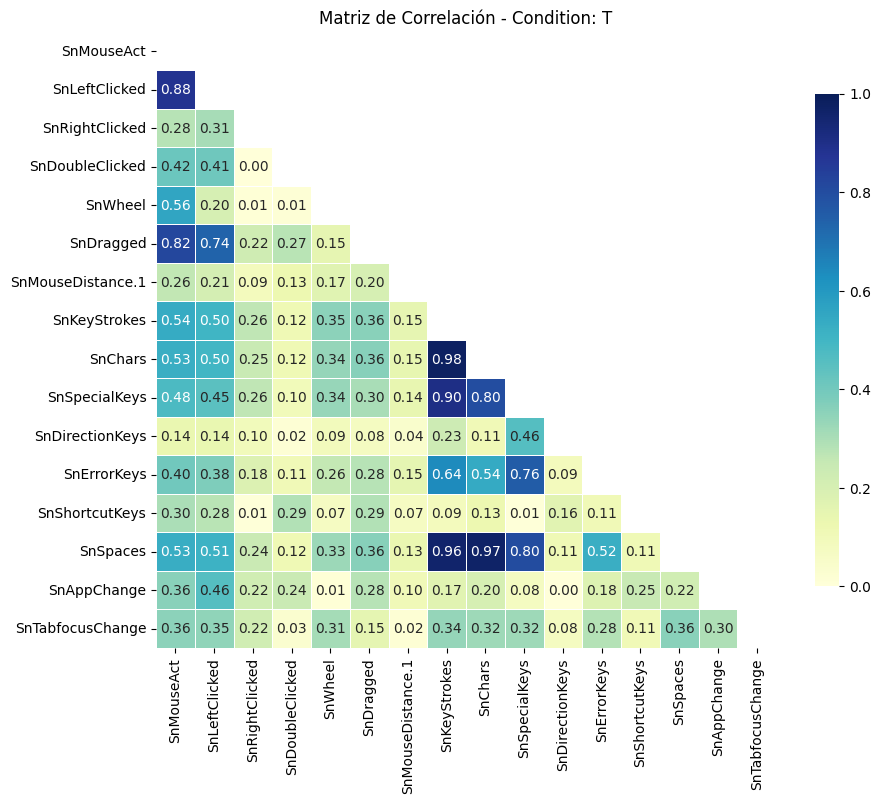

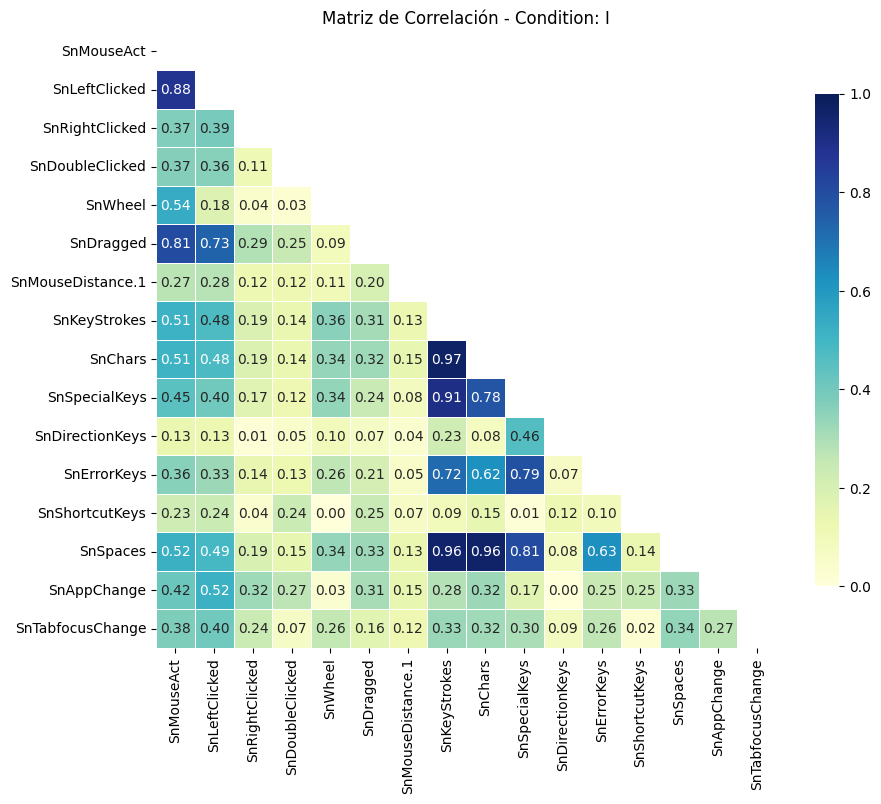

In [29]:
correlacion_por_condition(sheet_3, columnas_numericas_3)

### 1.2.1 Análisis histogramas

Creamos histogramas de sheet1 y sheet 3 y observamos que sheet3 está escalado, por lo que podemos descartar sheet1.

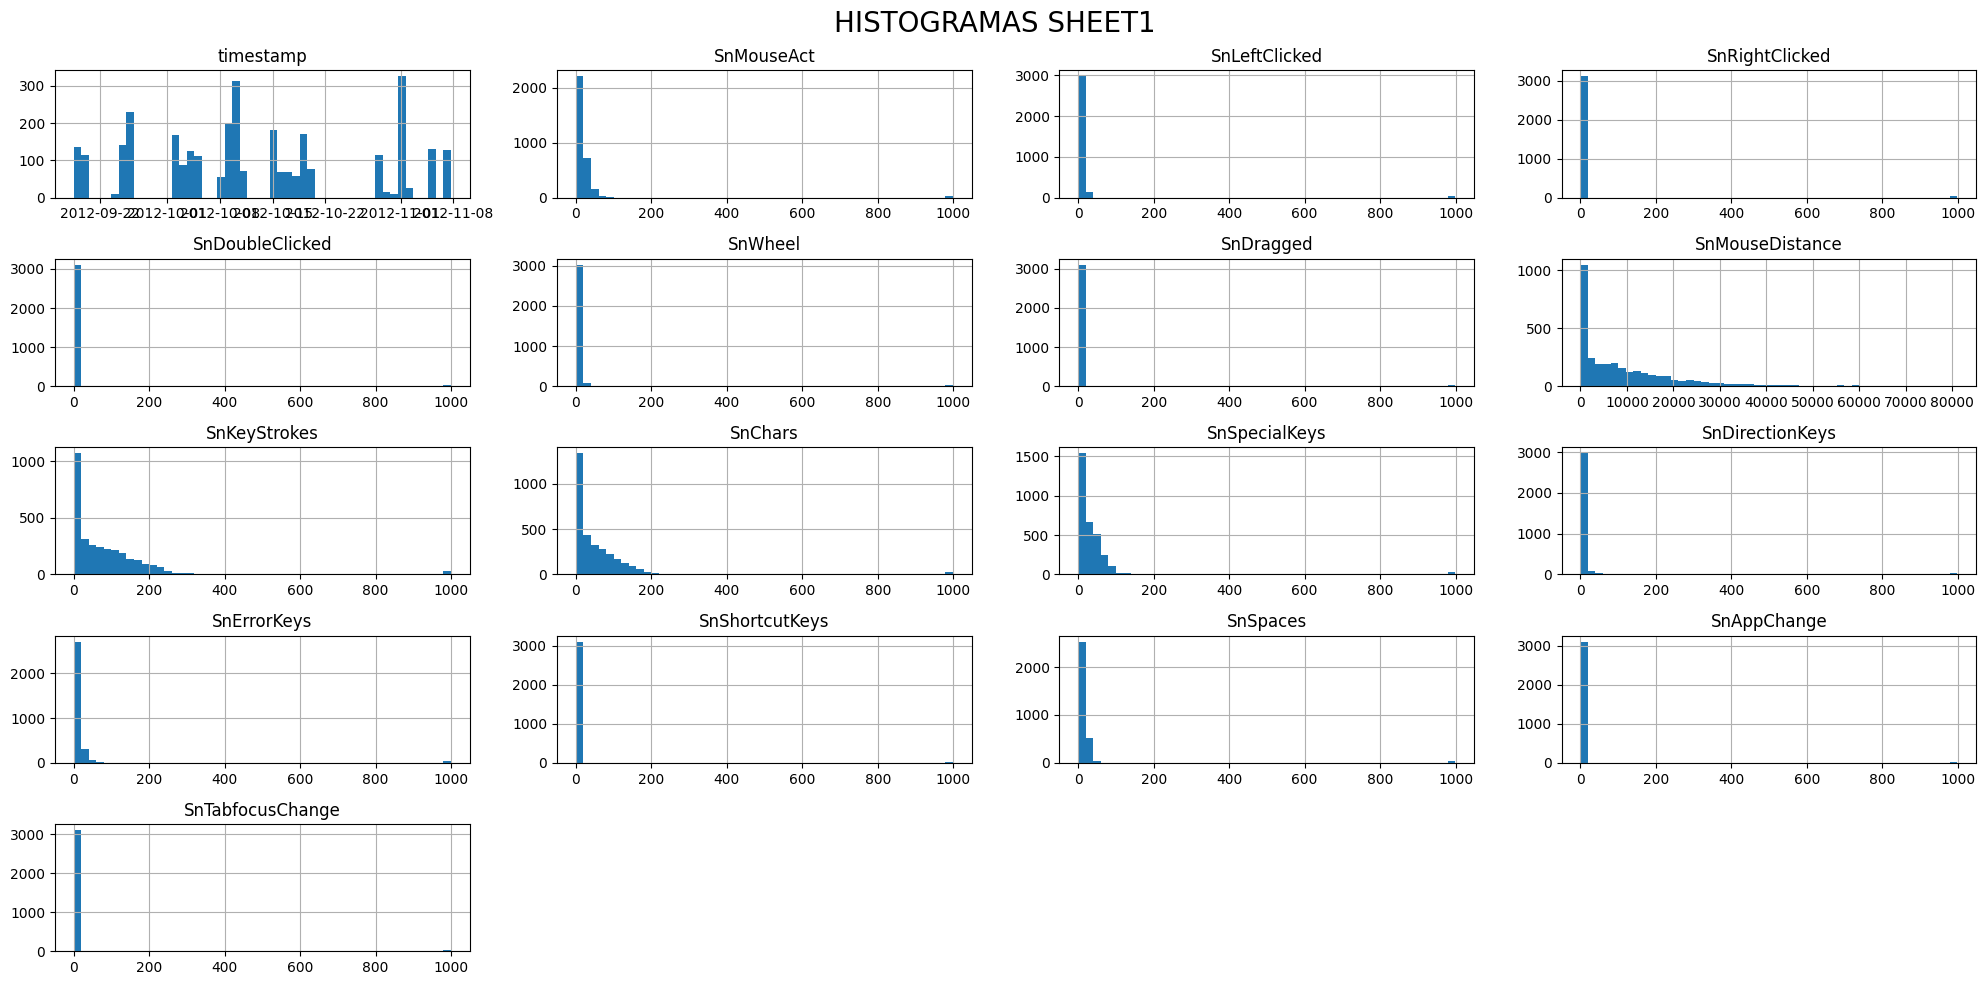

In [30]:
# creamos histogramas para ver la distribución de variables
sheet_1.hist(bins=50,figsize=(20,10))
plt.suptitle('HISTOGRAMAS SHEET1', fontsize=20)
plt.tight_layout()
plt.show()

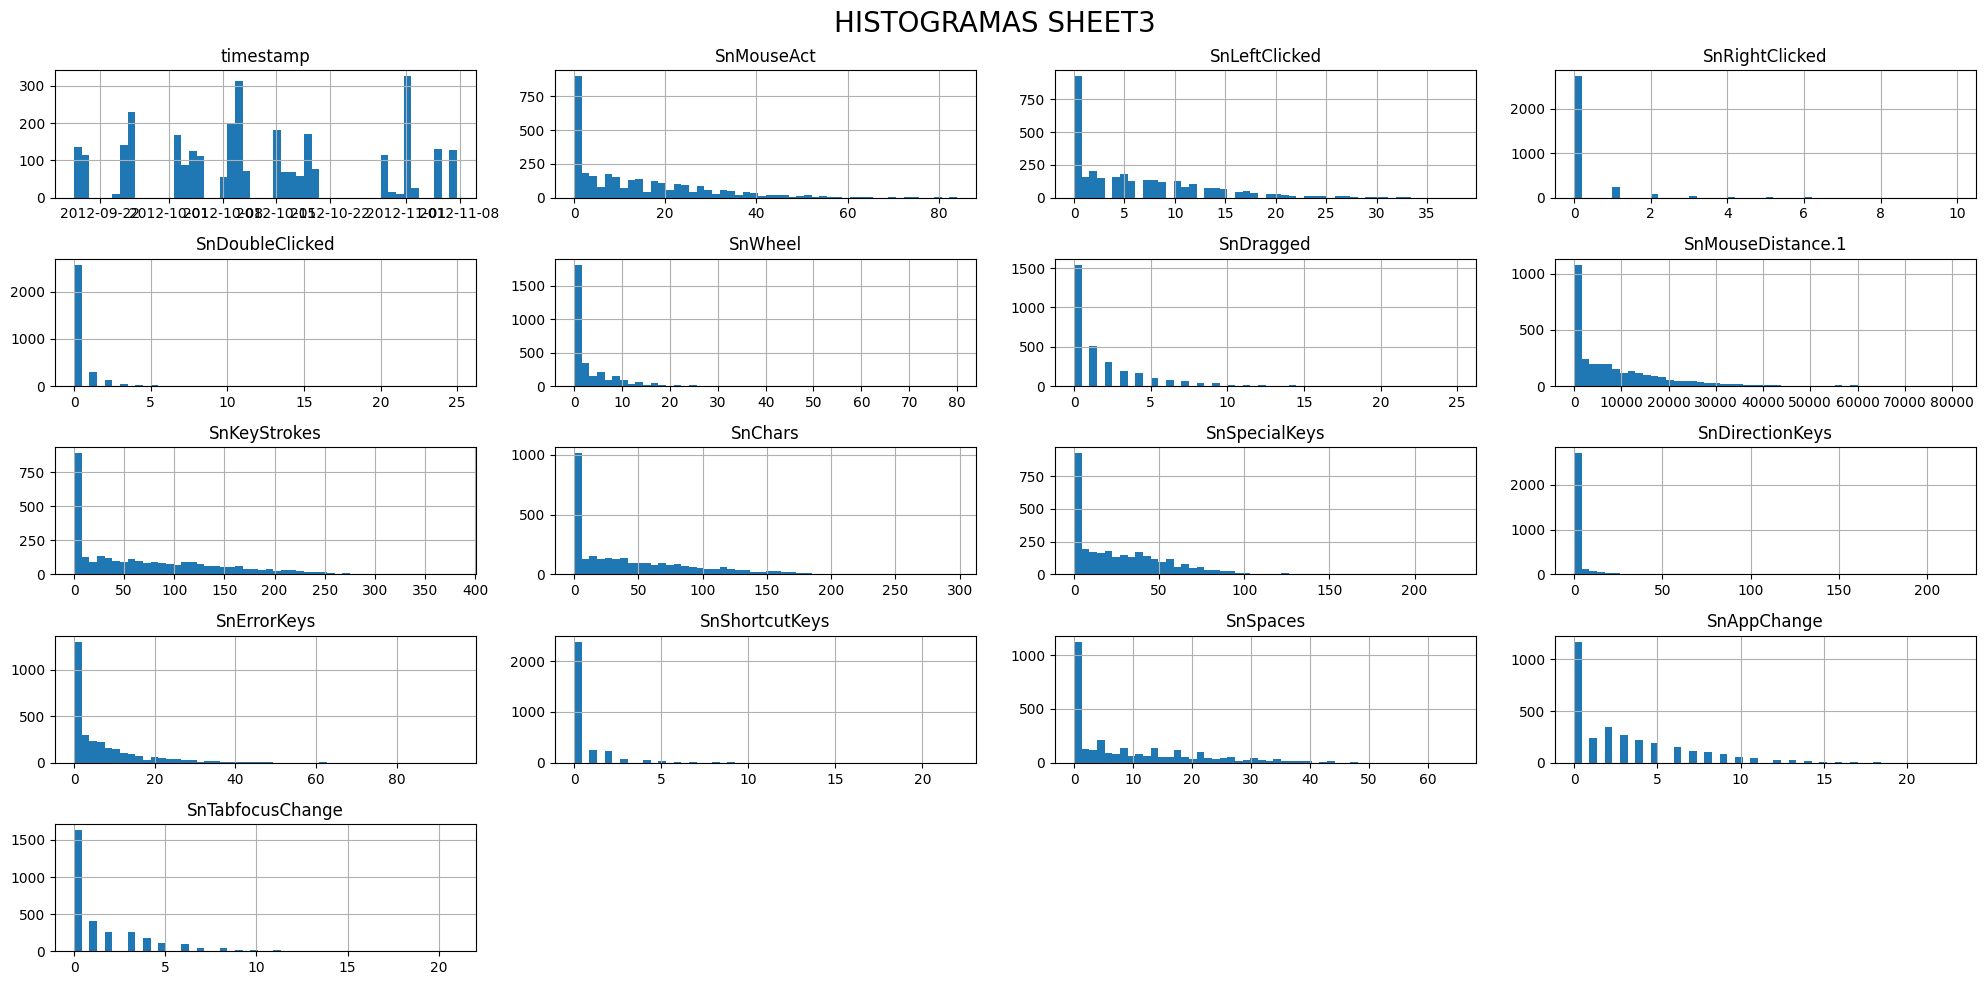

In [31]:
sheet_3.hist(bins=50,figsize=(20,10))
plt.suptitle('HISTOGRAMAS SHEET3', fontsize=20)
plt.tight_layout()
plt.show()

### 1.2.2 Análisis histogrmas con logaritmos y tranformaciones

Todas las variables, excepto 'timestamp' muestran cola pesada a la derecha, por lo que, podemos aplicar el logaritmo con el fin de encontrar una distribución mas Gaussiana.
Se genera el problema de que el valor más frecuente es el '0', al que no se le puede aplicar logaritmo. Posibles opciones:
* eliminar vslores = 0 del dataset --> se eliminan muchas instancias
* imputar un valor a muy pequeño a los ceros
* sumar a todos los valores +1
* Transformación Yeo-Johnson (acepta ceros y negativos) --> Si tus datos tienen muchos ceros
* Transformación Box-Cox (para datos positivos) --> Si tus datos son estrictamente positivos
* Raíz cuadrada --> simple y rápido

**Nota** sheet_3 tiene valores NaN. Voy a imputarlos con la moda para hacer los histogramas, ya que algunas transformacions no permite NaN

In [32]:
# Creo una copia
sheet_3_copy = sheet_3.copy()
# Instancio el imputador
imputer = SimpleImputer(strategy='most_frequent')
#Selecciono columnas numéricas y entreno
sheet_3_copy_num = sheet_3_copy.select_dtypes(include=[np.number])
imputer.fit(sheet_3_copy_num)
#transformo datos con la imputación
X = imputer.transform(sheet_3_copy_num)
# convierto en dataframe
sheet_3_copy_transform = pd.DataFrame(X, columns=sheet_3_copy_num.columns, index=sheet_3_copy_num.index)

In [33]:
# Instancio transformaión a logaritmo
log_transformer = FunctionTransformer(np.log)

1. imputamos valor muy pequeño a los 0

In [34]:
# hago copia para cada prueba
X_01 = sheet_3_copy_transform.copy()
for columna in sheet_3_copy_num:
   X_01.loc[X_01[columna] == 0, columna] += 0.1


In [35]:
X_01.head(2)

,SnMouseAct,SnLeftClicked,SnRightClicked,SnDoubleClicked,SnWheel,SnDragged,SnMouseDistance.1,SnKeyStrokes,SnChars,SnSpecialKeys,SnDirectionKeys,SnErrorKeys,SnShortcutKeys,SnSpaces,SnAppChange,SnTabfocusChange
0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1


In [36]:
# Ahora si puedo aplicar el logaritmo
X_01_log = log_transformer.transform(X_01)

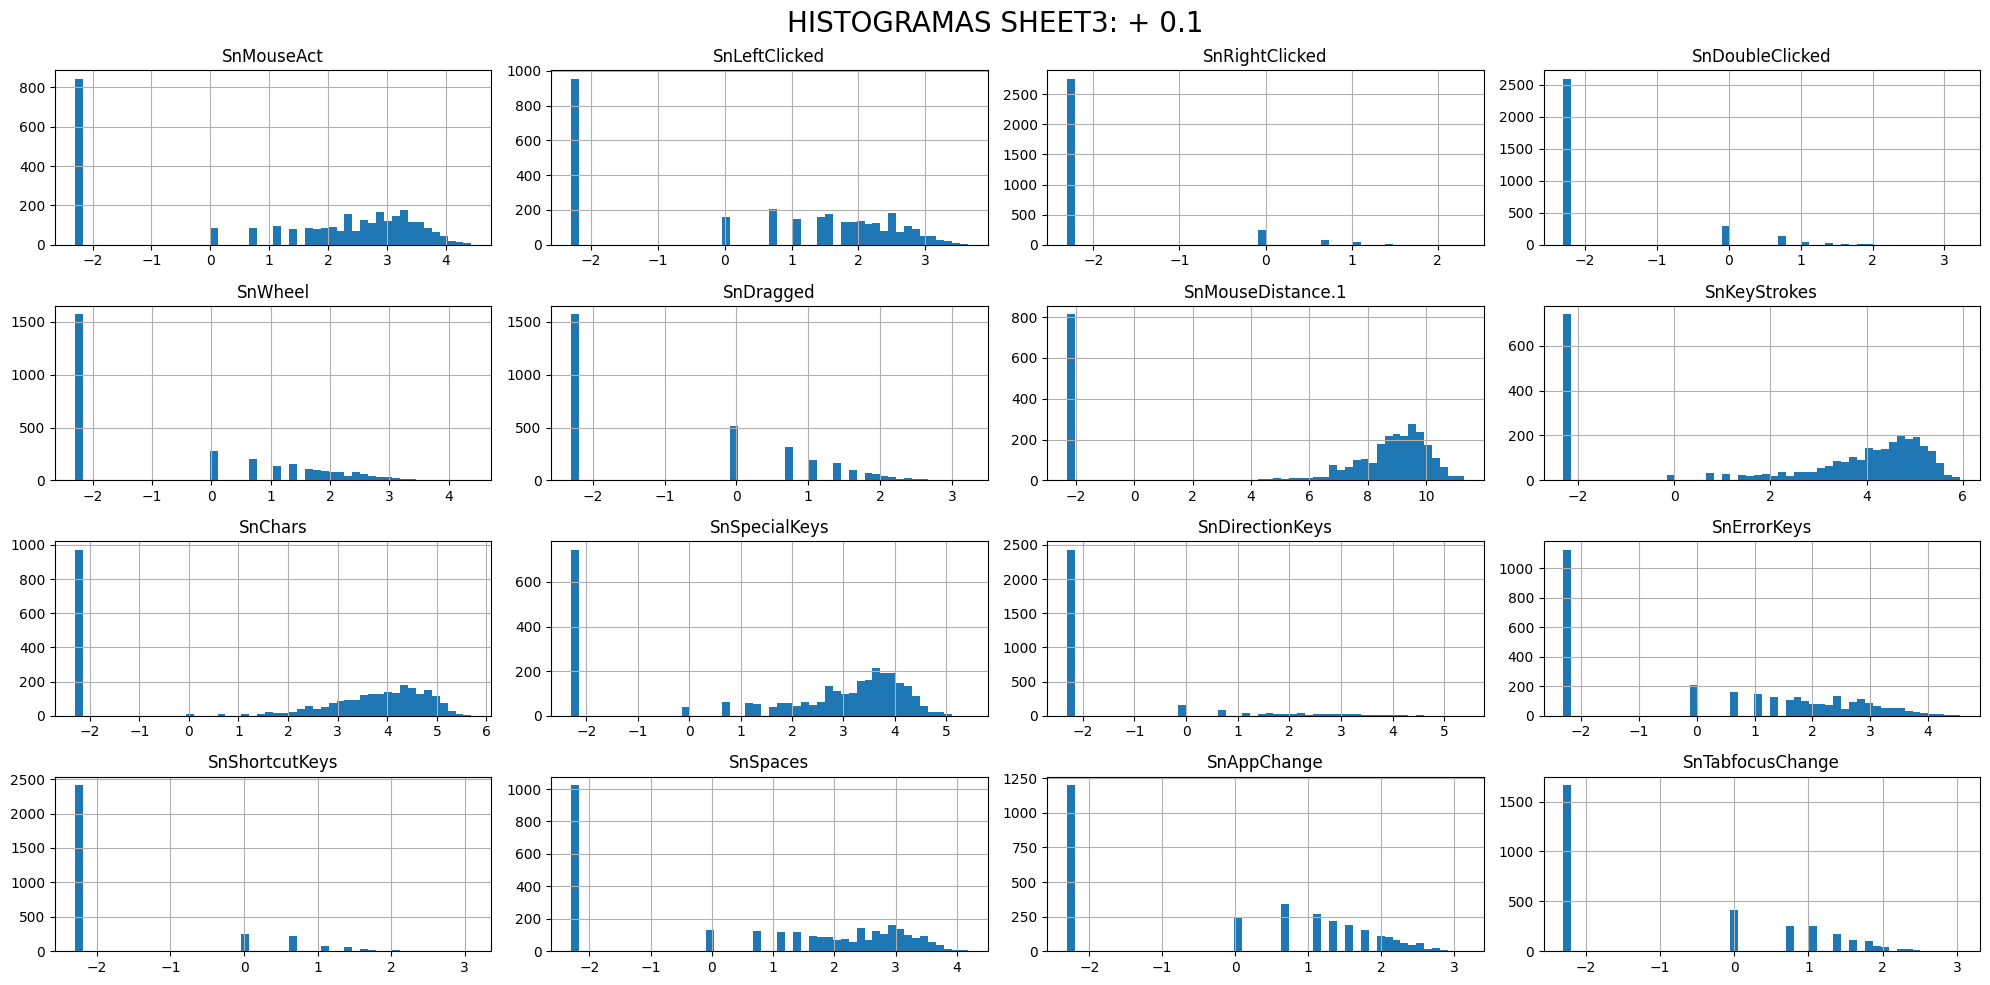

In [37]:
# vemos los histogramas
X_01_log.hist(bins=50,figsize=(20,10))
plt.suptitle('HISTOGRAMAS SHEET3: + 0.1', fontsize=20)
plt.tight_layout()
# Guardamos el histograma como imagen (puede ser PNG, JPG, PDF, etc.)
plt.savefig('histograma_X01.png', dpi=300)  # dpi=300 para mejor calidad
plt.show()

2. Sumamos a todos los valores +1

In [38]:
# hago copia para cada prueba
X_mas_1 = sheet_3_copy_transform.copy()

for columna in X_mas_1.columns:
    X_mas_1[columna] += 1

In [39]:
X_mas_1.head(2)

,SnMouseAct,SnLeftClicked,SnRightClicked,SnDoubleClicked,SnWheel,SnDragged,SnMouseDistance.1,SnKeyStrokes,SnChars,SnSpecialKeys,SnDirectionKeys,SnErrorKeys,SnShortcutKeys,SnSpaces,SnAppChange,SnTabfocusChange
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [40]:
# Ahora si puedo aplicar el logaritmo
X_mas_1_log = log_transformer.transform(X_mas_1)

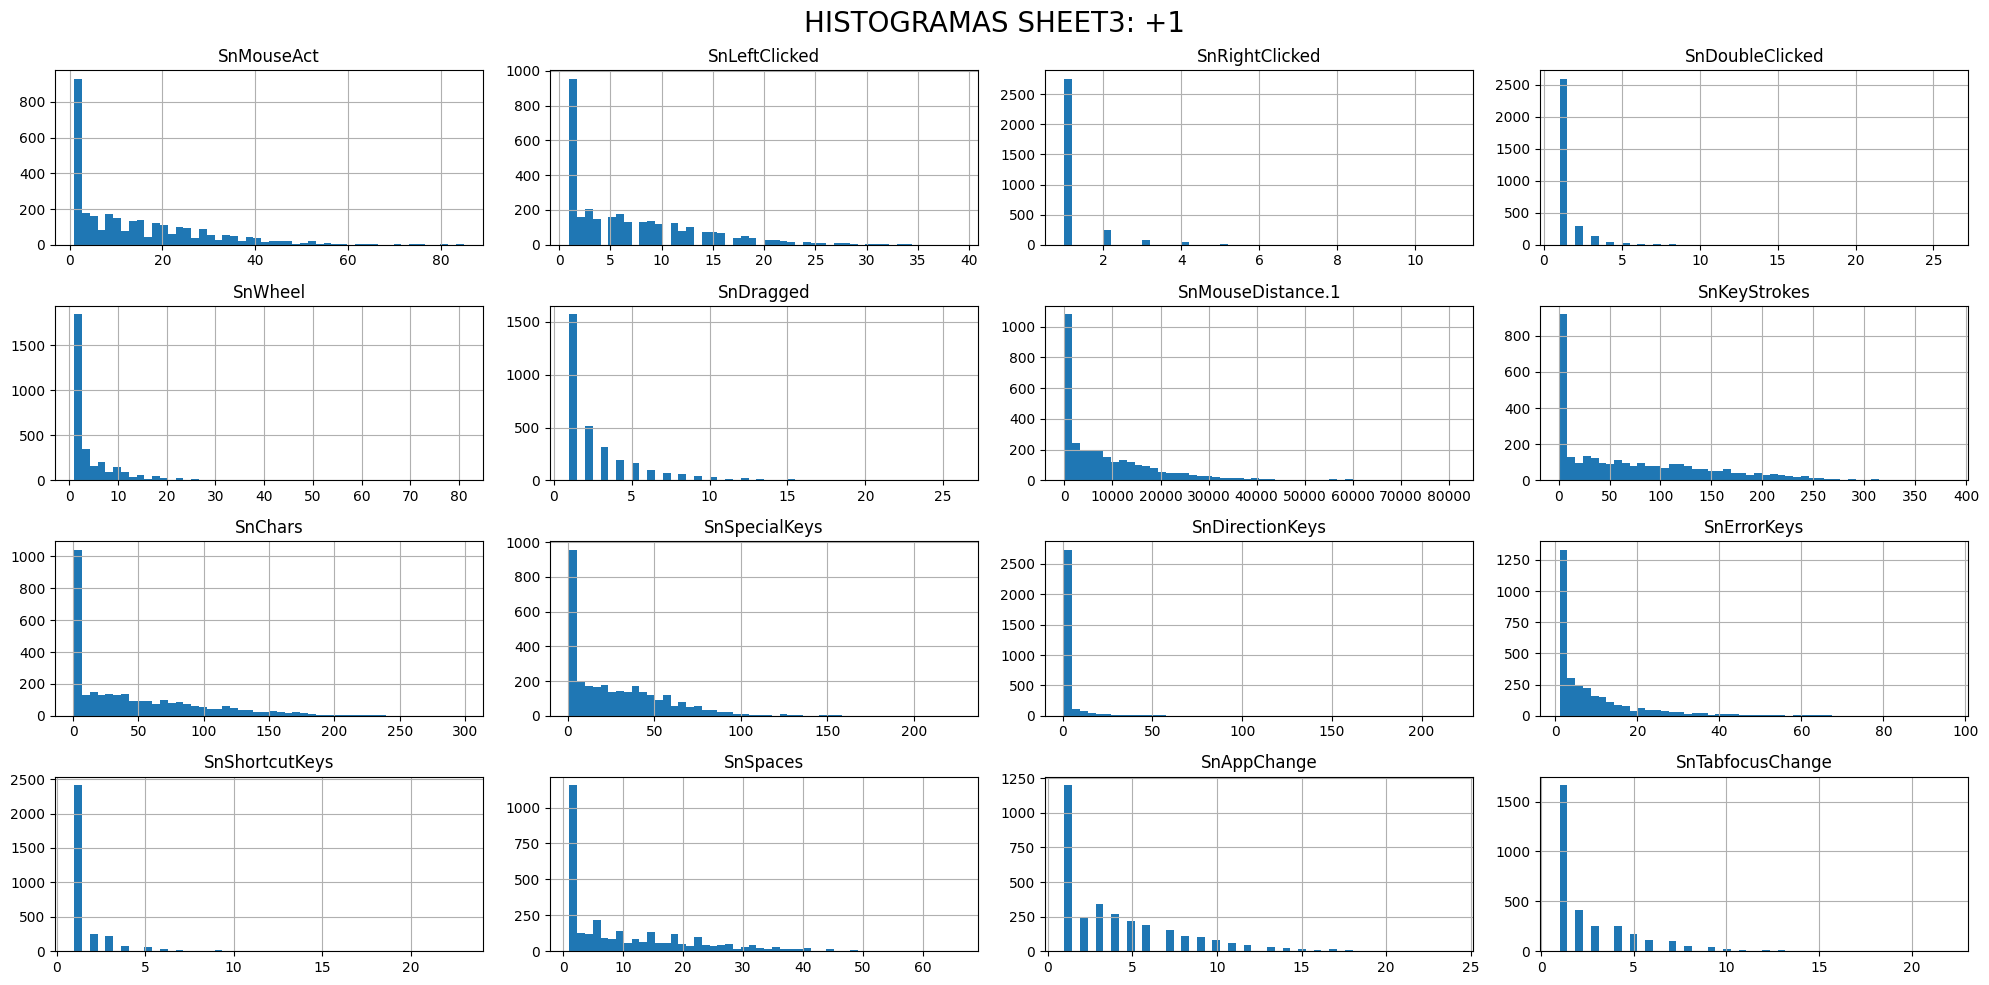

In [41]:
# vemos los histogramas
X_mas_1.hist(bins=50,figsize=(20,10))
plt.suptitle('HISTOGRAMAS SHEET3: +1', fontsize=20)
plt.tight_layout()
# Guardamos el histograma como imagen (puede ser PNG, JPG, PDF, etc.)
plt.savefig('histograma_X+1.png', dpi=300)  # dpi=300 para mejor calidad
plt.show()

Transformación Yeo-Johnson

In [42]:
# hago copia para cada prueba
X_yeo = sheet_3_copy_transform.copy()


yeo_johnson_transformer = PowerTransformer(method='yeo-johnson')
X_yeo_tr = yeo_johnson_transformer.fit_transform(X_yeo[X_yeo.columns])

# Convertimos el array de vuelta a DataFrame
X_yeo_tr = pd.DataFrame(X_yeo_tr, columns= X_yeo.columns, index=X_yeo.index)

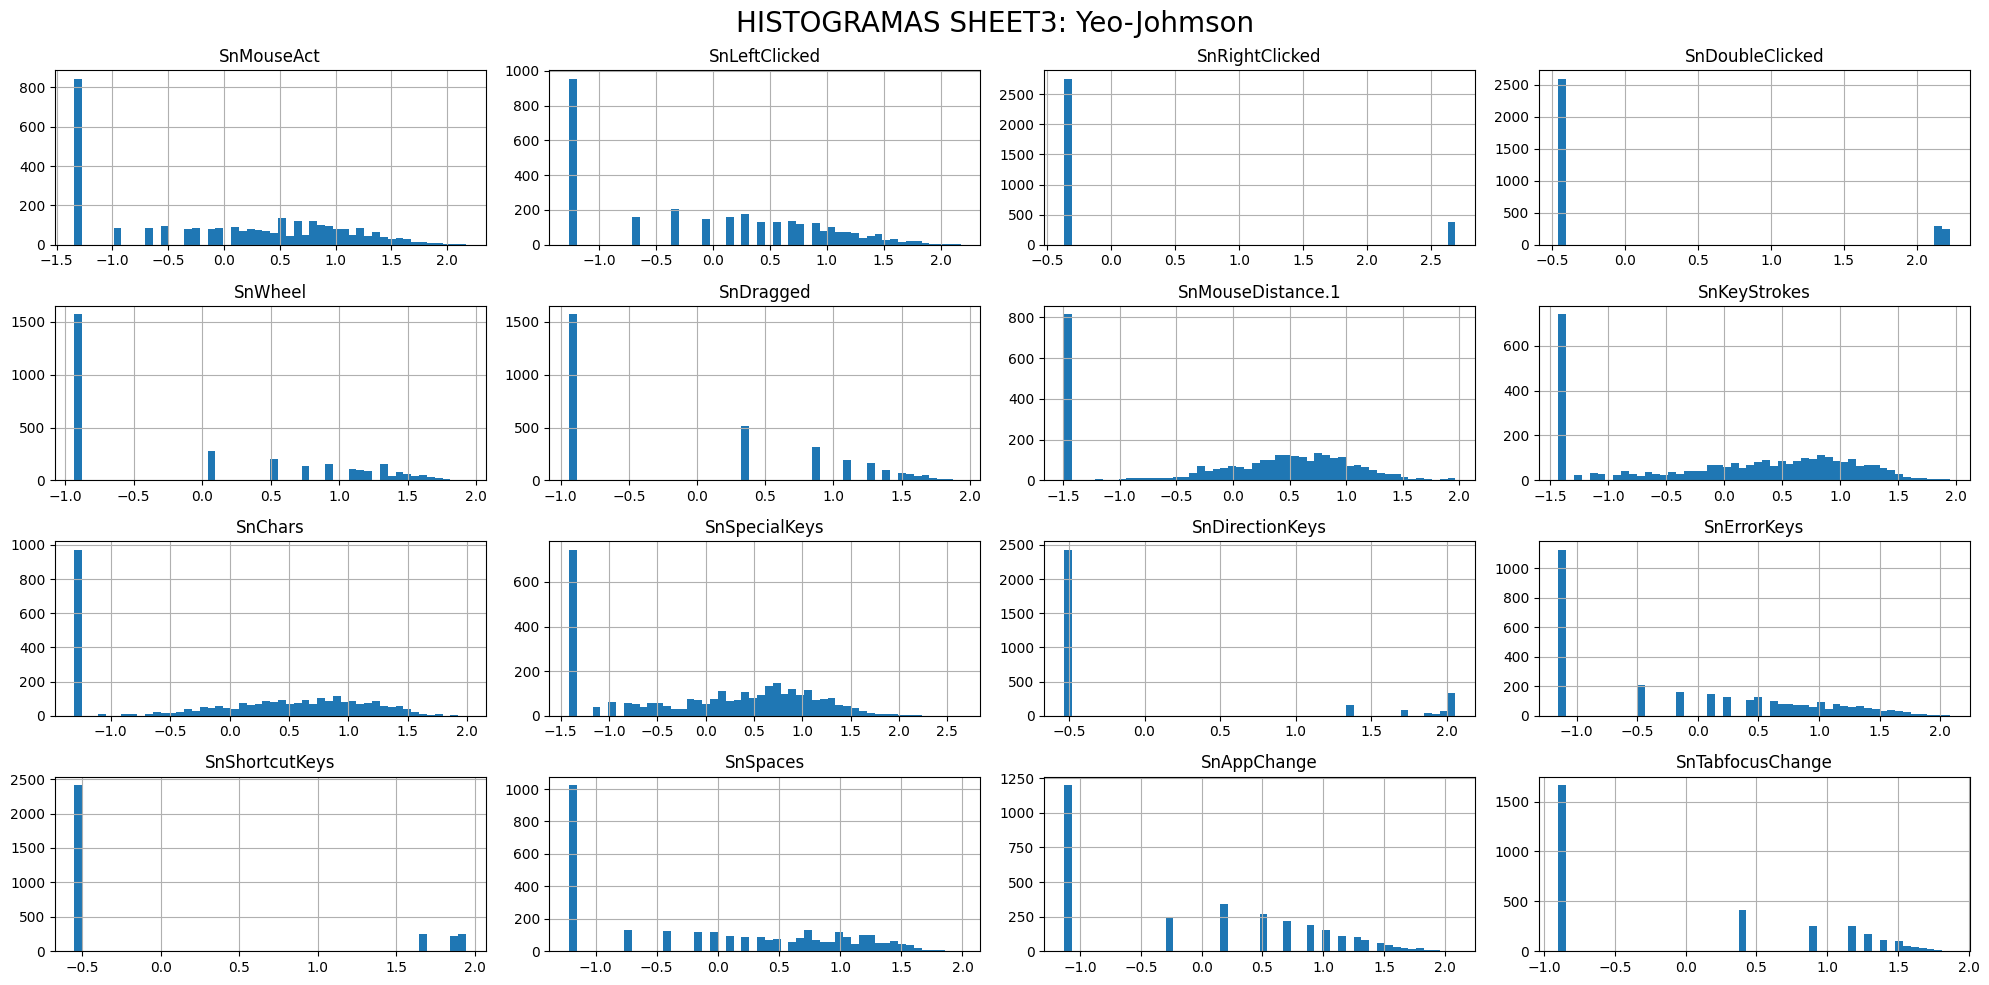

In [43]:
# vemos los histogramas
X_yeo_tr.hist(bins=50,figsize=(20,10))
plt.suptitle('HISTOGRAMAS SHEET3: Yeo-Johmson', fontsize=20)
plt.tight_layout()
plt.savefig('histograma_yeo Jonshon.png', dpi=300)  # dpi=300 para mejor calidad
plt.show()

Transformación Box-Cox

In [44]:
# hago copia para cada prueba
X_box_cox = sheet_3_copy_transform.copy()

from scipy.stats import boxcox

X_box_cox_tr = X_box_cox[X_box_cox.columns].apply(lambda x: boxcox(x + 1)[0])


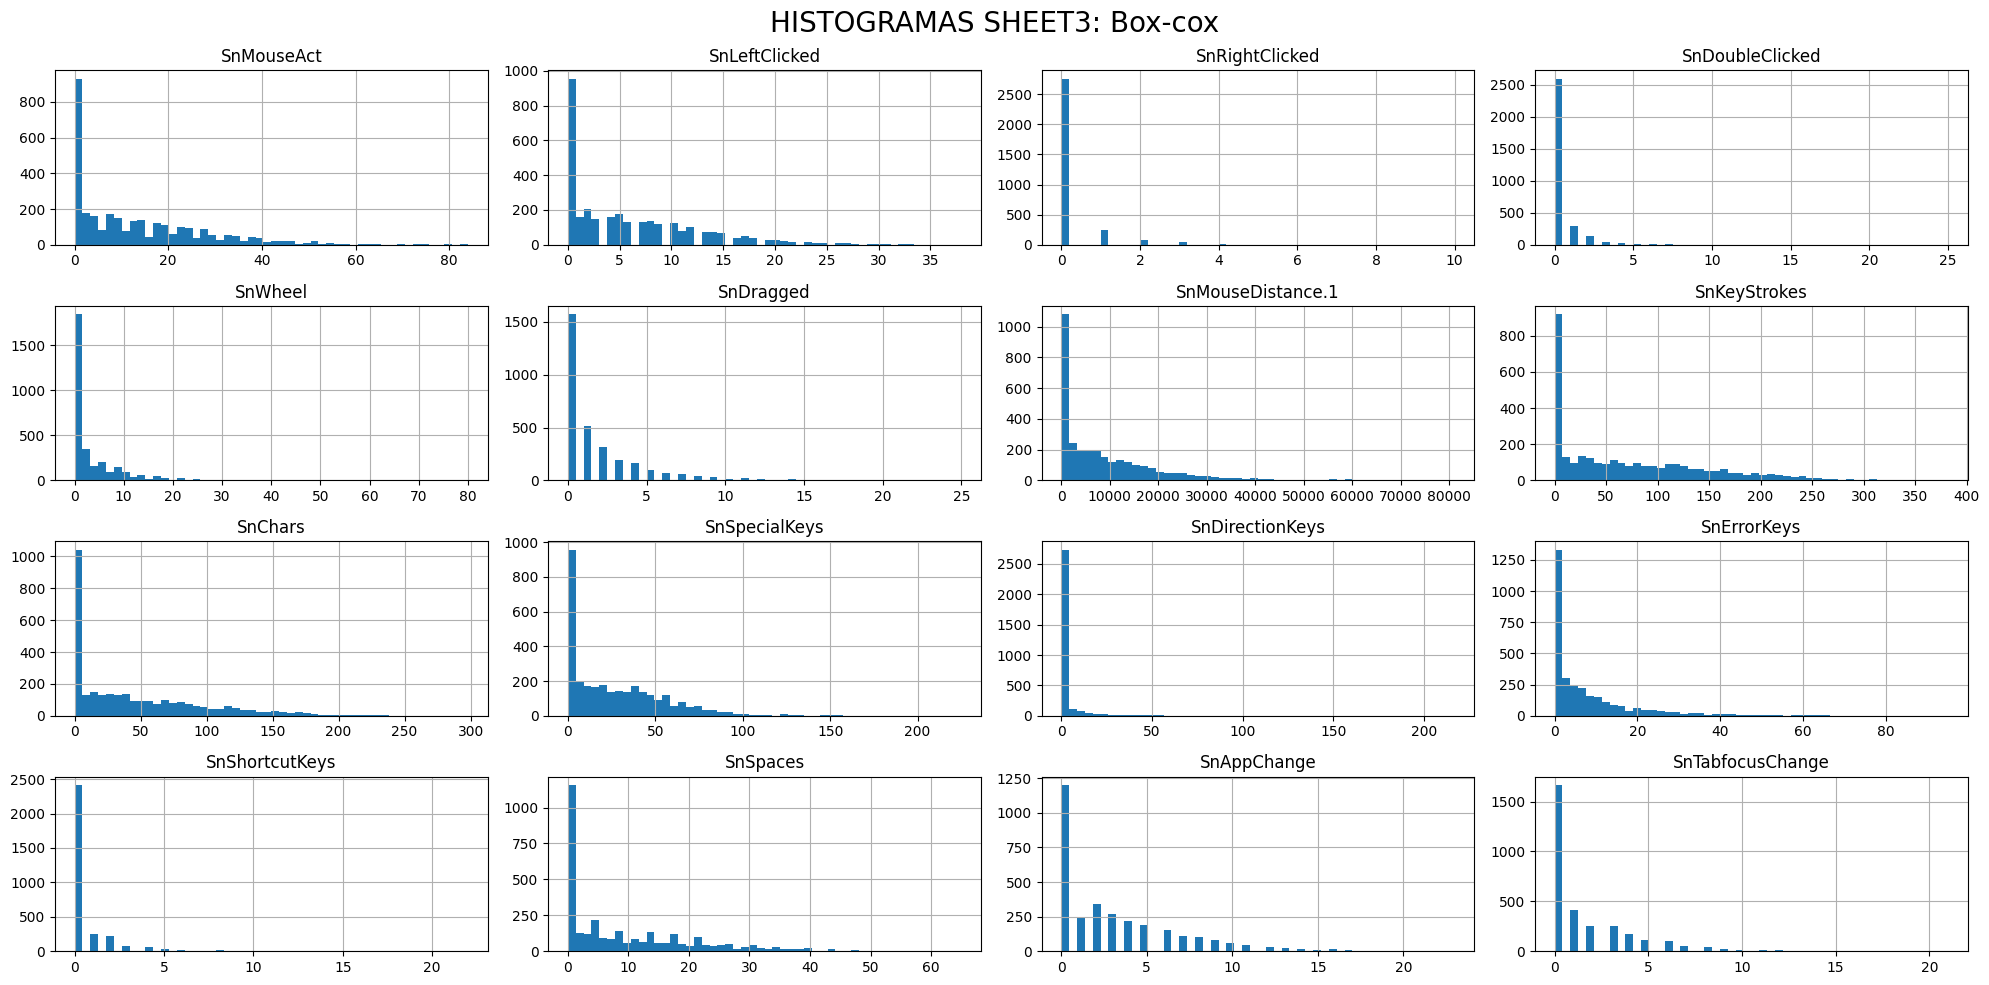

In [45]:
# vemos los histogramas
X_box_cox.hist(bins=50,figsize=(20,10))
plt.suptitle('HISTOGRAMAS SHEET3: Box-cox', fontsize=20)
plt.tight_layout()
plt.savefig('histograma_boxcox', dpi=300)  # dpi=300 para mejor calidad
plt.show()

### 1.2.3 Imputaciones y transformaciones finales : sheet_3

Imputación con código

In [46]:
# Cargamos de nuevo sheet_3
sheet_3 = cargar_datos_csv("A - Computer interaction features (Ulog - All Features per minute)-Sheet_3.csv")
# Cargar los datos
df = sheet_3

# Cambiar 'Blok' a categórica
df['Blok'] = df['Blok'].astype('category')

# Cambiar 'Condition' a categórica
df['Condition'] = df['Condition'].astype('category')

# Eliminar la variable 'SnMouseDistance.1'
df = df.drop(columns=['SnMouseDistance.1','PP', 'timestamp'])

# Seleccionar las variables numéricas
numeric_cols = df.select_dtypes(include=['float64']).columns

# Imputar valores NaN con la moda agrupando por 'Condition'
for col in numeric_cols:
    mode_per_condition = df.groupby('Condition', observed=False)[col].apply(lambda x: x.mode()[0])
    df[col] = df.apply(lambda row: mode_per_condition[row['Condition']] if pd.isna(row[col]) else row[col], axis=1)

# Paso 6: Aplicar One Hot Encoding a 'Blok' y 'Condition'
encoder = OneHotEncoder(drop='first', sparse_output=False)
df_encoded = pd.DataFrame(encoder.fit_transform(df[['Blok', 'Condition']]))
df_encoded.columns = encoder.get_feature_names_out(['Blok', 'Condition'])

# Añadir las columnas codificadas al DataFrame original
df = pd.concat([df, df_encoded], axis=1).drop(columns=['Blok', 'Condition'])

# Imputar transformación Yeo-Johnson a las variables numéricas
transformer = PowerTransformer(method='yeo-johnson')
df[numeric_cols] = transformer.fit_transform(df[numeric_cols])

# Devolver array con todas las variables preprocesadas
X_preprocessed = df.values

# Devolver el array de las características preprocesadas
X_preprocessed


Datos cargados correctamente: A - Computer interaction features (Ulog - All Features per minute)-Sheet_3.csv


array([[-1.33946726, -1.26703795, -0.37271834, ...,  0.        ,
         1.        ,  0.        ],
       [-1.33946726, -1.26703795, -0.37271834, ...,  0.        ,
         1.        ,  0.        ],
       [-1.33946726, -1.26703795, -0.37271834, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.42990701,  0.29999198, -0.37271834, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.30215233,  1.11735862, -0.37271834, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.89219393,  1.70728542, -0.37271834, ...,  0.        ,
         0.        ,  1.        ]], shape=(3140, 21))

Imputación Pipeline

In [47]:
# Función para reemplazar valores 999.0 con NaN
def replace_999_with_nan(X):
    X = pd.DataFrame(X)  # Convertir a DataFrame para operaciones más fáciles
    #print("Antes de reemplazar 999:", X.head())  #  Debug
    X = X.replace(999.0, np.nan)  # Asegurar que el reemplazo sea en float
    #print("Después de reemplazar 999:", X.head())  #  Debug
    return X

# Cargar datos
sheet_3 = cargar_datos_csv("A - Computer interaction features (Ulog - All Features per minute)-Sheet_3.csv")
#Features
numeric_features = [
    'SnMouseAct', 'SnLeftClicked', 'SnRightClicked', 'SnDoubleClicked', 'SnWheel',
    'SnDragged', 'SnMouseDistance.1', 'SnKeyStrokes', 'SnChars', 'SnSpecialKeys',
    'SnDirectionKeys', 'SnErrorKeys', 'SnShortcutKeys', 'SnSpaces', 'SnAppChange',
    'SnTabfocusChange'
]
categorical_features = ['Blok', 'Condition']
# Convertir solo las columnas numéricas a valores numéricos
for column in numeric_features:
    sheet_3[column] = pd.to_numeric(sheet_3[column], errors='coerce')

# Asegurar que los valores 999.0000 sean reemplazados antes del pipeline
sheet_3[numeric_features] = sheet_3[numeric_features].replace(999.0, np.nan)

#print("Datos antes del preprocesamiento:")
#print(sheet_3.head())  # Debug

# Definir el Pipeline para las variables numéricas
numeric_pipeline = Pipeline([
    ('replace_999', FunctionTransformer(replace_999_with_nan, validate=False)),  # Validación desactivada para arrays
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputación de valores faltantes
    ('yeo', PowerTransformer(method='yeo-johnson'))  # Transformación para normalización
])

# Definir el Pipeline para las variables categóricas
categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(drop='first', sparse_output=False))  # Corrección del error de sintaxis sparse depemnde de la versión de sci-kit Learn
])

# Definir el ColumnTransformer
preprocessing = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

# Aplicar el preprocesamiento
P_preprocessed = preprocessing.fit_transform(sheet_3)

#print("Datos después del preprocesamiento:")
#print(P_preprocessed[:5])  #  Debug: Mostrar primeras filas

Datos cargados correctamente: A - Computer interaction features (Ulog - All Features per minute)-Sheet_3.csv


In [48]:
X_preprocessed == P_preprocessed


array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]], shape=(3140, 21))

. Programación funcional de preprocesamiento de datos. Incluidas funciones en utils.py

In [49]:
data = "A - Computer interaction features (Ulog - All Features per minute)-Sheet_3.csv"
numeric_features = [
    'SnMouseAct', 'SnLeftClicked', 'SnRightClicked', 'SnDoubleClicked', 'SnWheel',
    'SnDragged', 'SnMouseDistance.1', 'SnKeyStrokes', 'SnChars', 'SnSpecialKeys',
    'SnDirectionKeys', 'SnErrorKeys', 'SnShortcutKeys', 'SnSpaces', 'SnAppChange',
    'SnTabfocusChange'
]
categorical_features = ['Blok', 'Condition']

In [50]:

P_preprocessed_functional = preprocess_data(data, numeric_features, categorical_features)

In [51]:
X_preprocessed == P_preprocessed_functional

,SnMouseAct,SnLeftClicked,SnRightClicked,SnDoubleClicked,SnWheel,SnDragged,SnMouseDistance.1,SnKeyStrokes,SnChars,SnSpecialKeys,...,SnErrorKeys,SnShortcutKeys,SnSpaces,SnAppChange,SnTabfocusChange,Blok_2,Blok_3,Condition_N,Condition_R,Condition_T
0,True,True,True,True,True,True,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,True,True,True,True,True,True,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3136,True,True,True,True,True,True,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3137,True,True,True,True,True,True,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3138,True,True,True,True,True,True,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [52]:
print(f'shape de sheet_3: {sheet_3.shape}')
print(f'shape de P_prepreocessed_functional: {P_preprocessed_functional.shape}')


shape de sheet_3: (3140, 21)
shape de P_prepreocessed_functional: (3140, 21)


In [53]:
comparar_columnas(sheet_3, P_preprocessed_functional)

Columnas en común: {'SnDragged', 'SnTabfocusChange', 'SnErrorKeys', 'SnLeftClicked', 'SnSpaces', 'SnAppChange', 'SnDirectionKeys', 'SnDoubleClicked', 'SnMouseDistance.1', 'SnRightClicked', 'SnKeyStrokes', 'SnMouseAct', 'SnWheel', 'SnSpecialKeys', 'SnShortcutKeys', 'SnChars'}
Columnas solo en el primer archivo: {'Blok', 'SnMouseDistance', 'Condition', 'timestamp', 'PP'}
Columnas solo en el segundo archivo: {'Condition_T', 'Condition_N', 'Condition_R', 'Blok_2', 'Blok_3'}


In [54]:
# features faltantes que quiero en el dataset preprocesado
features = ['PP','timestamp']

# mergeo data set final
Dataset_A_Limpio = sheet_3[features].join(P_preprocessed_functional)
# guardo .csv
Dataset_A_Limpio.to_csv('Dataset_A_Limpio',sep=';', index=True)



In [55]:
Dataset_A_Limpio.head()

,PP,timestamp,SnMouseAct,SnLeftClicked,SnRightClicked,SnDoubleClicked,SnWheel,SnDragged,SnMouseDistance.1,SnKeyStrokes,...,SnErrorKeys,SnShortcutKeys,SnSpaces,SnAppChange,SnTabfocusChange,Blok_2,Blok_3,Condition_N,Condition_R,Condition_T
0,PP1,2012-09-18 13:16:00,-1.339467,-1.267038,-0.372718,-0.456211,-0.931347,-0.939066,-1.472662,-1.431154,...,-1.150389,-0.548548,-1.216667,-1.133959,-0.898301,0.0,0.0,0.0,1.0,0.0
1,PP1,2012-09-18 13:17:00,-1.339467,-1.267038,-0.372718,-0.456211,-0.931347,-0.939066,-1.472662,-1.431154,...,-1.150389,-0.548548,-1.216667,-1.133959,-0.898301,0.0,0.0,0.0,1.0,0.0
2,PP1,2012-09-18 13:18:00,-1.339467,-1.267038,-0.372718,-0.456211,-0.931347,-0.939066,-1.472662,-1.431154,...,-1.150389,-0.548548,-1.216667,-1.133959,-0.898301,0.0,0.0,0.0,1.0,0.0
3,PP1,2012-09-18 13:19:00,-1.339467,-1.267038,-0.372718,-0.456211,-0.931347,-0.939066,-1.472662,-1.431154,...,-1.150389,-0.548548,-1.216667,-1.133959,-0.898301,0.0,0.0,0.0,1.0,0.0
4,PP1,2012-09-18 13:20:00,-1.339467,-1.267038,-0.372718,-0.456211,-0.931347,-0.939066,-1.472662,-1.431154,...,-1.150389,-0.548548,-1.216667,-1.133959,-0.898301,0.0,0.0,0.0,1.0,0.0
